# Source of the data 

The dataset is provided by Santander Bank and can be downloaded through the Kaggle website.

# Dataset description 

The dataset is a representative sample of Santander's customers and was provided for a competition, with the objective of predicting which product or products would be recommended to customers.

It provides 1.5 years of customer behavior data, the data starts from 2015-01-28 to 05/28/2016 and has monthly records of the 25 different possible products that a customer may have, among them is:

* Saving account
* Junior account
* Pension
* Credit cart
* Etc

Santander provides three csv files:
* train.csv: This is the dataset to work with as it is the one that contains the 25 products as columns. Originally it contains 13647309 records and 48 columns, so we will work with a representative sample which contains 6823654 records and the same 48 columns.
 
* test.csv: This dataset contains 929615 records and 25 columns; the missing columns are those of the financial products.

* sample_submission.csv: In this dataset there are only two columns and 929615 records, it is a sample of the correct format type, in which the different customers should have their recommended products.

# Statistical graphics

In [1]:
# Import the necessary libraries 
import pandas as pd
import random
import numpy as np
import missingno as msno
#from pywaffle import Waffle
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# for hide the warnings
import warnings
warnings.filterwarnings('ignore')
import mlxtend as ml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, RFE, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# load the data 
dd1 = pd.read_csv('sample_bank.csv', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'sample_bank.csv'

In [4]:
# drop unnecessary column 
dd1 = dd1.drop(['Unnamed: 0'], axis=1)

In [4]:
# show the data 
dd1.head()

fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1 ind_plan_fin_ult1  \
0        0.0          6     1.0  ...                0                 0   
1        0.0         35     1.0  ...                0                 0   
2        0.0         35     1.0  ...                0                 0   
3        0.0         35     1.0  ...                0                 0   
4        0.0         35     1.0  ...                0                 0   

  ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1 ind_valo_fin_ult1  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

  ind_viv_fin_ult1 ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1  
0                0             0.0                0.0                0  
1                0             0.0                0.0                0  
2                0             0.0                0.0                0  
3                0             0.0                0.0                0  
4                0             0.0                0.0                0  

[5 rows x 48 columns]

## EDA

In [5]:
# the shape of the df
dd1.shape

(6823654, 48)

In [6]:
# wacth the info of dataset
dd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823654 entries, 0 to 6823653
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta             

In [7]:
# see the null values 
dd1.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado               27734
pais_residencia            27734
sexo                       27765
age                            0
fecha_alta                 27734
ind_nuevo                  27734
antiguedad                     0
indrel                     27734
ult_fec_cli_1t           6812876
indrel_1mes               104797
tiprel_1mes               104797
indresi                    27734
indext                     27734
conyuemp                 6822769
canal_entrada             117688
indfall                    27734
tipodom                    27734
cod_prov                   62732
nomprov                    62732
ind_actividad_cliente      27734
renta                    1225863
segmento                  118604
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

In [5]:
# create a dataframe with the ID of the customers and the columns that have 27734 missing values 
nan_values = dd1.loc[:, ['ncodpers','ind_empleado', 'pais_residencia', 'fecha_alta', 'ind_nuevo', 'indrel', 'indresi', 'indext', 'indfall', 'tipodom', 'ind_actividad_cliente']]

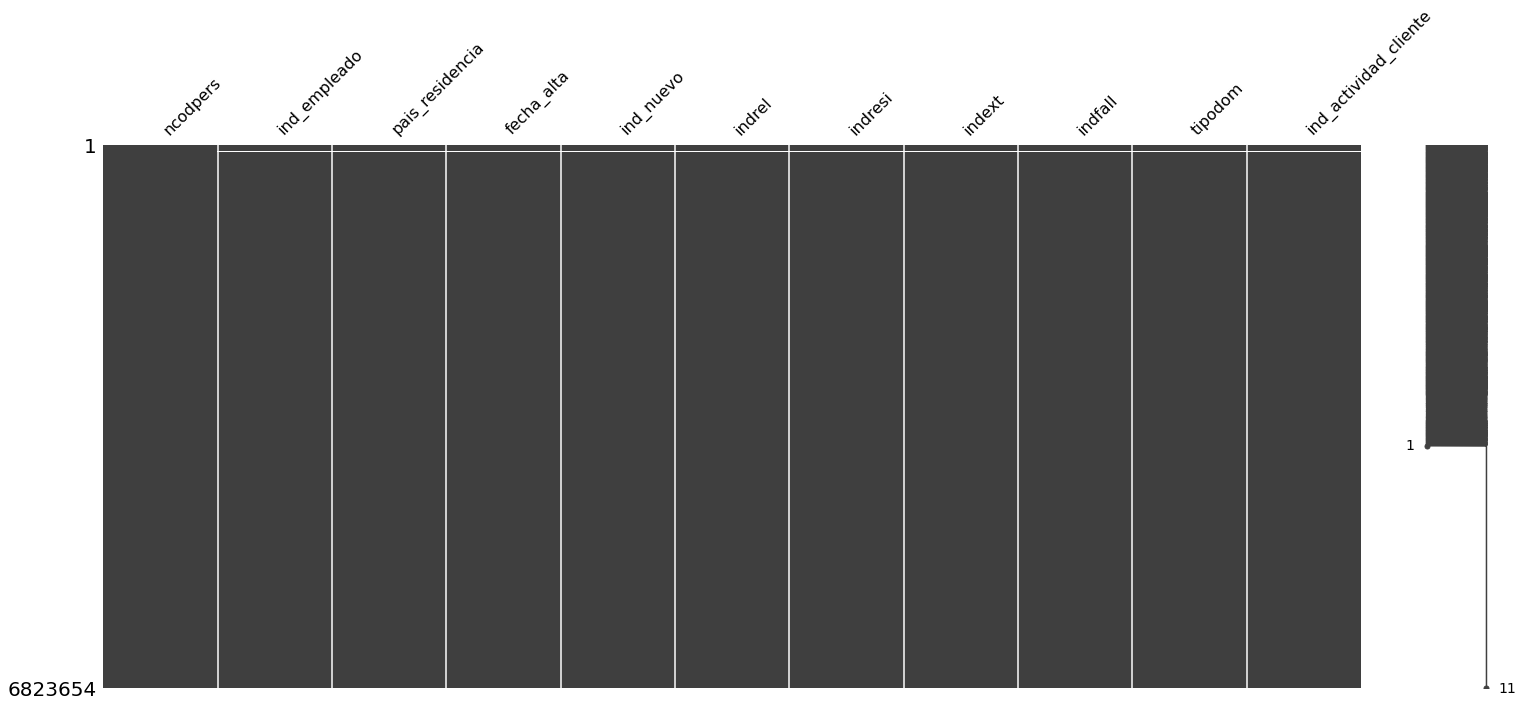

In [9]:
msno.matrix(nan_values)
plt.savefig('matrix_nan')

We can notice a small horizontal white line from the ind_employee variable to ind_customer_activity, which could indicate that the same number of customers have missing values in the same variables.

In [6]:
# create a DF that only have the missing values  
check = nan_values[nan_values.isna().any(axis=1)]

In [7]:
# verify if the missing values correspon to the same customers 
check

ncodpers ind_empleado pais_residencia fecha_alta  ind_nuevo  indrel  \
261       1050741          NaN             NaN        NaN        NaN     NaN   
1029      1051017          NaN             NaN        NaN        NaN     NaN   
1063      1051064          NaN             NaN        NaN        NaN     NaN   
1154      1051387          NaN             NaN        NaN        NaN     NaN   
1779      1048660          NaN             NaN        NaN        NaN     NaN   
...           ...          ...             ...        ...        ...     ...   
3775976    550081          NaN             NaN        NaN        NaN     NaN   
3776175    550693          NaN             NaN        NaN        NaN     NaN   
3776230    549518          NaN             NaN        NaN        NaN     NaN   
3776279    549207          NaN             NaN        NaN        NaN     NaN   
3776332    549255          NaN             NaN        NaN        NaN     NaN   

        indresi indext indfall  tipodom  ind_actividad_cliente  
261         NaN    NaN     NaN      NaN                    NaN  
1029        NaN    NaN     NaN      NaN                    NaN  
1063        NaN    NaN     NaN      NaN                    NaN  
1154        NaN    NaN     NaN      NaN                    NaN  
1779        NaN    NaN     NaN      NaN                    NaN  
...         ...    ...     ...      ...                    ...  
3775976     NaN    NaN     NaN      NaN                    NaN  
3776175     NaN    NaN     NaN      NaN                    NaN  
3776230     NaN    NaN     NaN      NaN                    NaN  
3776279     NaN    NaN     NaN      NaN                    NaN  
3776332     NaN    NaN     NaN      NaN                    NaN  

[27734 rows x 11 columns]

In [5]:
columns = ['ind_empleado', 'pais_residencia', 'fecha_alta', 'ind_nuevo', 'indrel', 'indresi', 'indext', 'indfall', 'tipodom', 'ind_actividad_cliente']

In [6]:
# drop the missing values of the same customers with 27734 missing values 
dd2 = dd1.dropna(subset=columns)

In [13]:
dd2.indresi.value_counts()

S    6760920
N      35000
Name: indresi, dtype: int64

In [14]:
dd2.indext.value_counts()

N    6483605
S     312315
Name: indext, dtype: int64

In [13]:
dd2.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado                   0
pais_residencia                0
sexo                          31
age                            0
fecha_alta                     0
ind_nuevo                      0
antiguedad                     0
indrel                         0
ult_fec_cli_1t           6785142
indrel_1mes                77063
tiprel_1mes                77063
indresi                        0
indext                         0
conyuemp                 6795035
canal_entrada              89954
indfall                        0
tipodom                        0
cod_prov                   34998
nomprov                    34998
ind_actividad_cliente          0
renta                    1198129
segmento                   90870
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

In [7]:
# fill the missing values with zero in the products that have missing values 
dd2['ind_nomina_ult1'] = dd2.ind_nomina_ult1.fillna(0)
dd2['ind_nom_pens_ult1'] = dd2.ind_nom_pens_ult1.fillna(0)

In [8]:
dd2['prods_by_m'] = dd2.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)

In [13]:
# check the unique values en conyuemp
dd2.conyuemp.unique()

array([nan, 'N', 'S'], dtype=object)

In [14]:
# know simple statistics for the variable conyuemp
dd2.conyuemp.describe()

count     885
unique      2
top         N
freq      876
Name: conyuemp, dtype: object

In [15]:
# we can see that the majority of the values are NaN, and only have 
# 876 with N and 9 with S
dd2.conyuemp.value_counts()

N    876
S      9
Name: conyuemp, dtype: int64

In [9]:
# drop the columns that have the majority of missing values
dd2 = dd2.drop(['conyuemp'], axis=1)

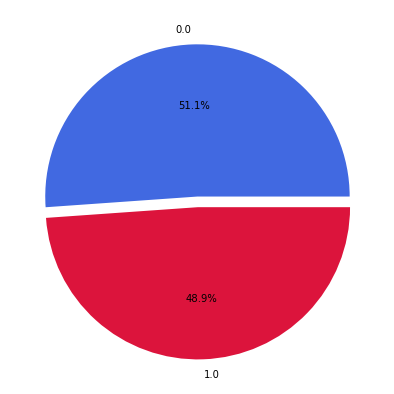

In [106]:
plt.figure(figsize=(10, 7))
dd2.ind_actividad_cliente.value_counts().plot(kind='pie', autopct='%0.1f%%', explode=[0,0.07], colors=['royalblue', 'crimson'])
plt.ylabel('', fontsize=14)
plt.savefig('ind_actividad_cliente')
plt.show()

In [23]:
plt.figure(figsize=(13, 20))
dd2.pais_residencia.value_counts().plot(kind='barh')
plt.title('Distribution of country residence', fontsize=13)
plt.xlabel('Number of customers', fontsize=13)
plt.ylabel('Country residence', fontsize=13)
plt.tick_params(axis='both', labelsize=12)
plt.xscale('log')
plt.savefig('Distributon of country residence')
plt.show()

We can see that the majority of the customer are from ES (Spain) and the minority are from ZW (Zimbabue)

In [24]:
#dd2.renta.value_counts().plot(kind='barh')

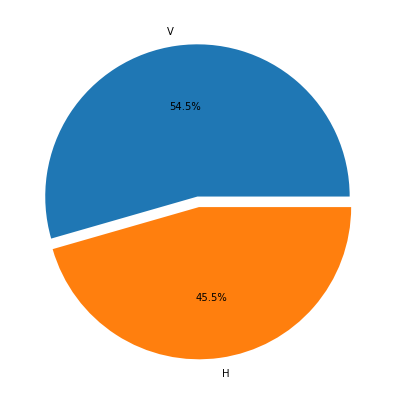

In [25]:
# whacth the sex of the clients 
plt.figure(figsize=(10, 7))
dd2.sexo.value_counts().plot(kind='pie', autopct='%0.1f%%', explode=[0,0.07])
plt.ylabel('', fontsize=14)
plt.savefig('sexo')
plt.show()

We can see that most of the clients are women (V), although there is not much difference with men, since the difference between them is only 9%.

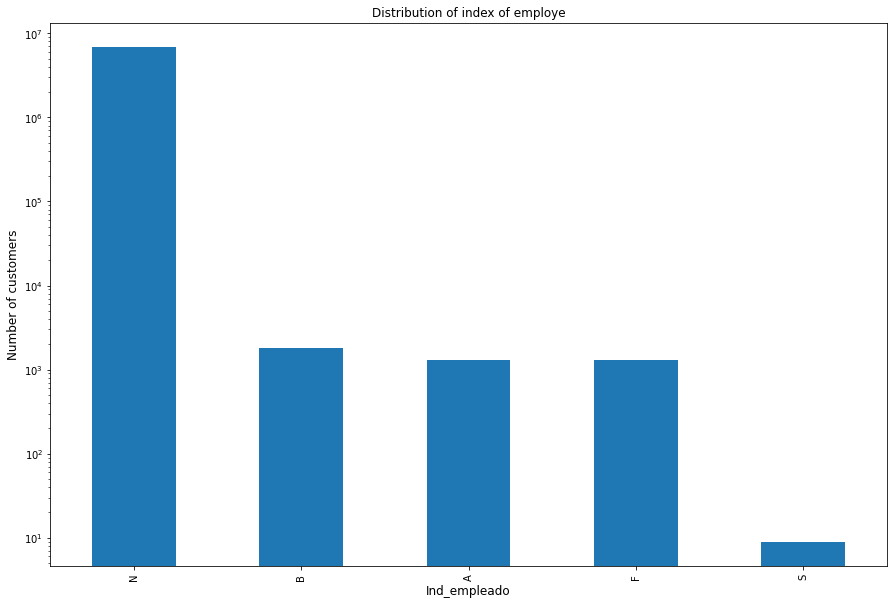

In [109]:
dd2.ind_empleado.value_counts().plot(kind='bar', figsize=[15,10])
plt.title('Distribution of index of employe', fontsize=12)
plt.xlabel("Ind_empleado", fontsize=12)
plt.ylabel("Number of customers", fontsize=12)
plt.yscale('log')
plt.show()

In [17]:
new = dd2.age.value_counts().sort_values()
plt.figure(figsize=(18,40))
plt.barh(new.index, new.values, color='green')
for i, v in enumerate(new.values):
    plt.text(v, i, f'{v:,}'.replace('.', ',').replace(',0', ''), color="black", fontweight='bold')
plt.box(False)
plt.title('Distribution of Ages', fontsize=15)
plt.subplots_adjust(left=0.22, hspace=.3)
plt.xticks([])
plt.savefig('only ages')
plt.show()

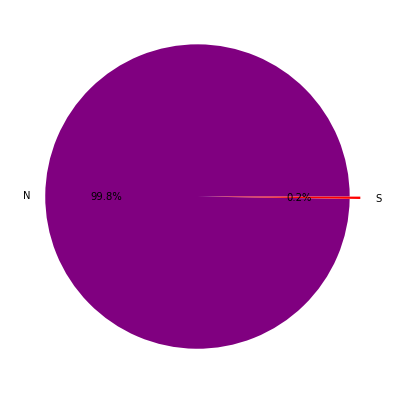

In [27]:
plt.figure(figsize=(10, 7))
dd2.indfall.value_counts().plot(kind='pie', autopct='%0.1f%%', explode=[0,0.07], colors=['purple', 'red'])
plt.ylabel('', fontsize=14)
plt.savefig("indfall")
plt.show()

We can see that most of the clients are alive and only .2% are dead.

Podemos ver que la mayoria de los clientes se encuentran vivos y solo el .2% estan muertos.

In [9]:
# Convert age colum in numerical colums
dd2['age'] = pd.to_numeric(dd2.age, errors='coerce')

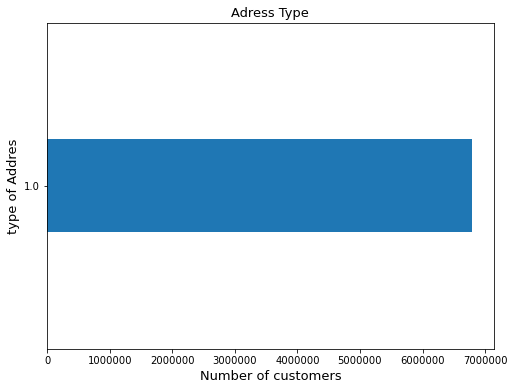

In [29]:
# Se quita 
dd2.tipodom.value_counts().plot(kind='barh', figsize=[8, 6], width=.2)
plt.title("Adress Type", fontsize=13)
plt.ylabel("type of Addres", fontsize=13)
plt.xlabel("Number of customers", fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('tipodom')
plt.show()

We can see that the only type of address is 1 so this variable will be deleted. 

Podemos ver que el unico tipo de direccion es 1 por lo que se eliminara esta variable.

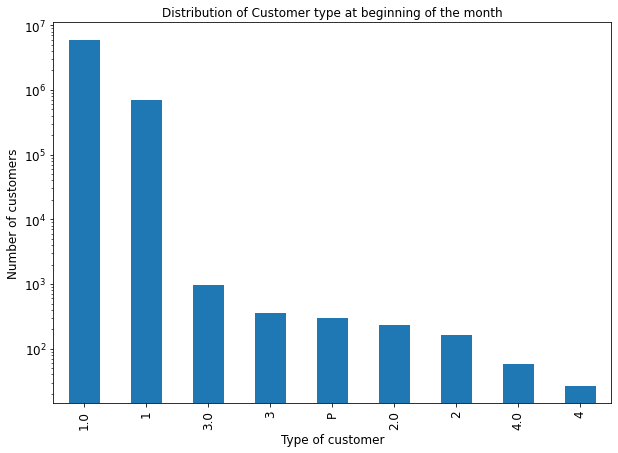

In [30]:
plt.figure(figsize=(10, 7))
dd2.indrel_1mes.value_counts().plot(kind='bar')
plt.title('Distribution of Customer type at beginning of the month')
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Type of customer', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.yscale('log')
plt.savefig('indrel_1mes_first')
plt.show()

In this graph we can see the type of client at the beginning of the month, according to the description of the dataset there are 5 different categories, but we can see in the graph that there are 9 different categories, some with the same value as others but written in a different way, so we will proceed to do the corresponding cleaning.

In [10]:
dd2.indrel_1mes = dd2.indrel_1mes.str.replace('1.0', '1').replace('3.0', '3').replace('2.0', '2').replace('4.0', '4')

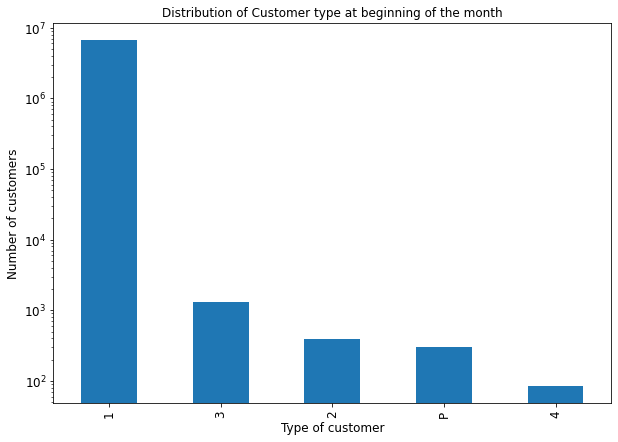

In [15]:
plt.figure(figsize=(10, 7))
dd2.indrel_1mes.value_counts().plot(kind='bar')
plt.title('Distribution of Customer type at beginning of the month')
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Type of customer', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.yscale('log')
plt.savefig("indrel_1mes_second")
plt.show()

Once the corresponding cleaning has been done, we can see that most of the customers belong to category "1", that is, main customer, and finally we have "4" who belongs to the category of former co-owner.    

revisar en cuantos casos son diferentes entre las dos 

In [20]:
plt.figure(figsize=(10, 7))
dd2.tiprel_1mes.value_counts().plot(kind='bar')
plt.title('Distribution of Customer relation type at the beginning of the month', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Type of customer', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.yscale('log')
plt.savefig('tiprel_1mes')
plt.show()

This graph belongs to the type of relationship with customers at the beginning of the month, it can be seen that most of the customers are active, but on the other hand there is a number almost similar to the number of active customers that belongs to inactive customers, finally it can be seen that there is one customer whose status is unknown and is marked with an N.

In [11]:
# we obtain the index where the tripel_1mes is equal to N
index = dd2[dd2['tiprel_1mes'] == 'N'].index

In [12]:
dd2 = dd2.drop(index)

In [22]:
plt.figure(figsize=(10, 7))
dd2.tiprel_1mes.value_counts().plot(kind='bar')
plt.title('Distribution of Customer relation type at the beginning of the month', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Type of customer', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.yscale('log')
plt.savefig('tiprel_1mes')
plt.show()

In [36]:
a_ver = dd2.canal_entrada.value_counts().sort_values()
plt.figure(figsize=(20,50))
plt.barh(a_ver.index, a_ver.values, color='mediumpurple')
for i, v in enumerate(a_ver.values):
    plt.text(v, i, f'{v:,}'.replace('.', ',').replace(',0', ''), color="black", fontweight='bold')
plt.box(False)
plt.title('Distribution of Canal de entrada', fontsize=15)
plt.subplots_adjust(left=0.22, hspace=.3)
plt.xticks([])
plt.savefig('canal_entrada')
plt.show()

This graph pertains to the inbound channel of the customers, that is, the channel used to join, it can be seen that there are three main channels:
* KHE
* KAT
* KFC

In [39]:
plt.figure(figsize=(10, 7))
dd2.indresi.value_counts().plot(kind='pie',  autopct='%0.1f%%', explode=[0,0.09], colors=['cyan', 'red'])
plt.title("Are the customers of the same contry than the bank?", )
plt.ylabel('')
plt.savefig('indresi')
plt.show()

It can be seen that the majority of clients reside in the same country as the bank and only 0.5% reside in a different country.

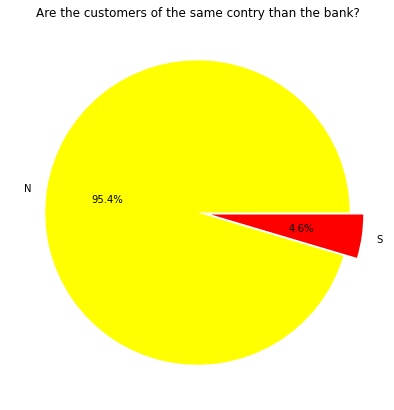

In [40]:
plt.figure(figsize=(10, 7))
dd2.indext.value_counts().plot(kind='pie',  autopct='%0.1f%%', explode=[0,0.09], colors=['yellow', 'red'])
plt.title("Are the customers of the same contry than the bank?", )
plt.ylabel('')
plt.savefig('indext')
plt.show()

We can see that the majority of the clients are not different from the country of birth to the country of the bank with 95.5% of the clients and only 4.6% were born in a country other than the country of the bank. 

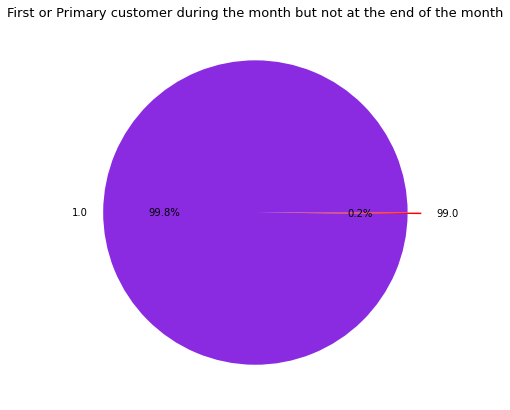

In [41]:
plt.figure(figsize=(10, 7))
dd2.indrel.value_counts().plot(kind='pie',  autopct='%0.1f%%', explode=[0,0.09], colors=['blueviolet', 'red'])
plt.title("First or Primary customer during the month but not at the end of the month", fontsize=13)
plt.ylabel('')
plt.savefig('indrel')
plt.show()

We can see that 99.8% of customers belong to First / Prymary and only the .2% belong to Primary Customer During The Month But not at the end of the month 

Podemos ver que el 99.8% de los clientes perteneces a First/prymary y solo el .2% pertenece a Primary customer during the month but not at the end of the month

In [42]:
p = dd2.prods_by_m.value_counts().sort_values(ascending=False)
plt.figure(figsize=(11,7))
sns.barplot(x=p.index, y=p.values, palette="viridis", order=p.index)
plt.xlabel("Number of Products", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.tick_params(axis='both', labelsize=12)
plt.savefig("prods_by_m")
plt.show()

In the graph above we can see that the majority of customers only have one product from the bank and there are even customers who have 0 products contracted.

In [14]:
dd2.age = dd2.age.astype(np.int64)

In [13]:
# create a new DF where it only has the age, renta, products and number of products by month are columns 
dd2.age = dd2.age.astype(np.int64)
df_rent = dd2.loc[:, ['age','renta']].join(dd2.loc[:, 'ind_ahor_fin_ult1':'prods_by_m'])

In [14]:
# Create a Df group by the number of products every month and aggregate the mean of age and renta
df_age_r = df_rent.groupby('prods_by_m')['age', 'renta'].agg("mean")
# sort the values by the age and prods_by_m
df_age_r = df_age_r.sort_values(by=['age', 'prods_by_m'])

In [15]:
# create a new DF as the previous, but in reverser order for the plot Number of products by average incomes (renta)
df_age_r2 = df_age_r.sort_values(by=['renta', 'prods_by_m'])

In [16]:
# make a plot of number of products by average age
plt.figure(figsize=(11,7))
sns.barplot(x=df_age_r.index, y=df_age_r.age, palette="rocket_r", order=df_age_r.index)
plt.title('Number of products by average age', fontsize=13)
plt.ylabel("Average Age", fontsize=13)
plt.xlabel("Number of Products", fontsize=13)
plt.tick_params(axis='both', labelsize=12)
plt.show()

In the graph above, we can see that people over 40 years old are the ones who have 11 different products from the bank, compared to customers who are over 30 years old but under 40 years old who have only one product.

comentar en el boxplot de abajo o hacer con boxplot

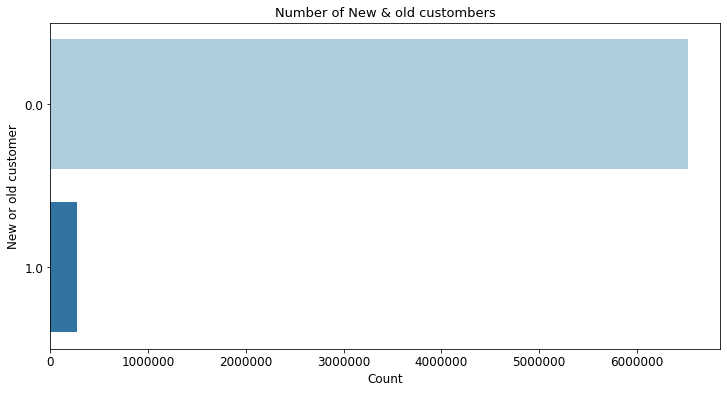

In [47]:
# make graph of new customber (1.0) vs old customer (0.0)
plt.figure(figsize=(12,6))
sns.countplot(y=dd2['ind_nuevo'], palette = "Paired")
plt.title('Number of New & old custombers', fontsize=13)
plt.ylabel('New or old customer', fontsize=12)
plt.xlabel('Count', fontsize=12)
#plt.xscale('log')
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis='both', labelsize=12)
plt.savefig("ind_nuevo")
plt.show()

The above graph shows that most of the bank's customers have been with the bank for more than 6 months, so they are considered new customers.

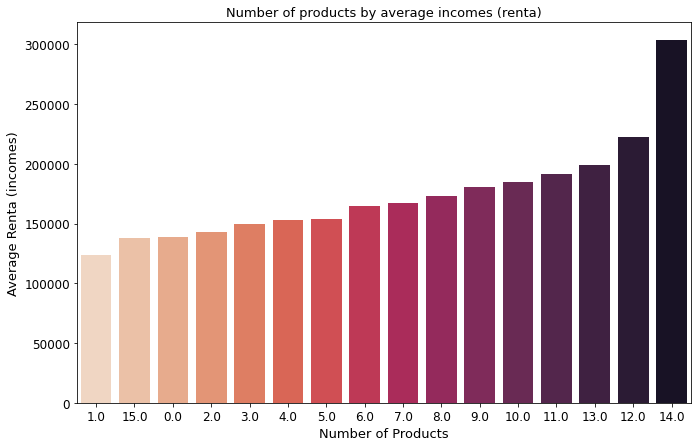

In [48]:
# Make a graph Number of products by average incomes (renta)
plt.figure(figsize=(11,7))
sns.barplot(x=df_age_r2.index, y=df_age_r2.renta, palette="rocket_r", order=df_age_r2.index)
plt.title('Number of products by average incomes (renta)', fontsize=13)
plt.ylabel("Average Renta (incomes)", fontsize=13)
plt.xlabel("Number of Products", fontsize=13)
plt.tick_params(axis='both', labelsize=12)
plt.show()

In this graph we can see that people with an average household gross income of around 300,000 are the ones with the highest number of products (14) in the bank.

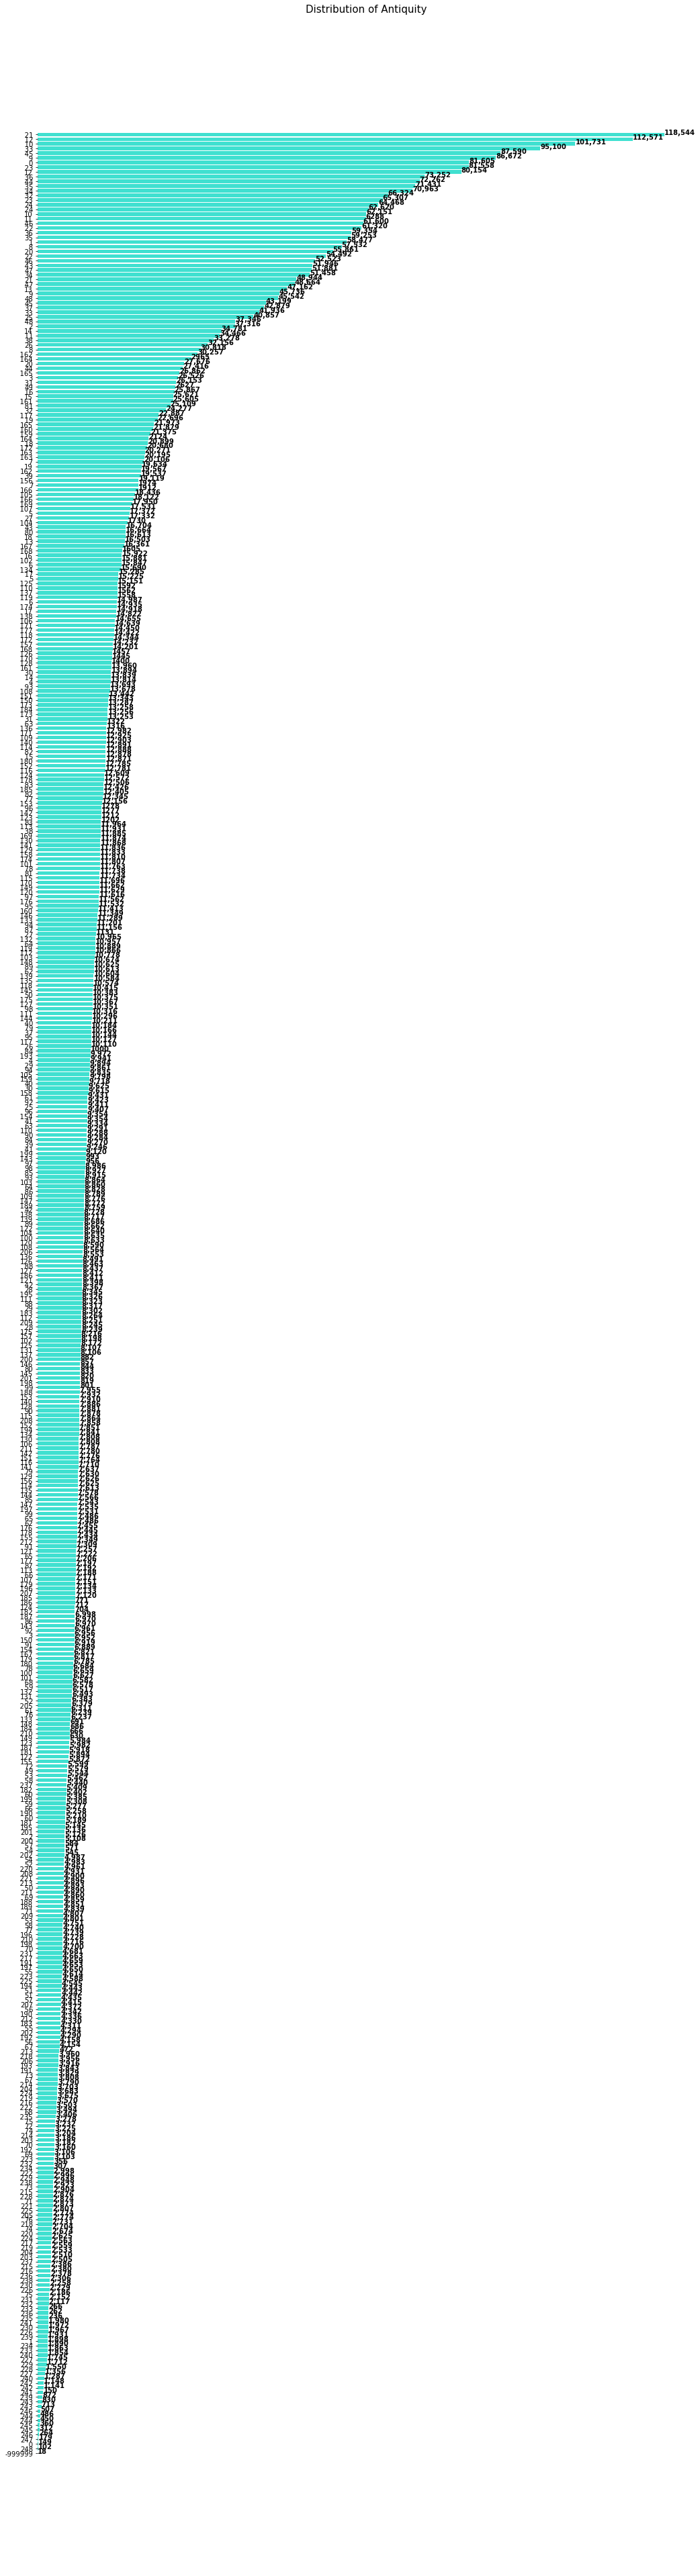

In [49]:
# Create the graph of Antiquity of customers 
counts = dd2.antiguedad.value_counts().sort_values()
plt.figure(figsize=(20,70))
plt.barh(counts.index, counts.values, color='turquoise')
for i, v in enumerate(counts.values):
    plt.text(v, i, f'{v:,}'.replace('.', ',').replace(',0', ''), color="black", fontweight='bold')
plt.box(False)
plt.title('Distribution of Antiquity', fontsize=15)
plt.subplots_adjust(left=0.22)
plt.xticks([])
plt.savefig('antiguedad')
plt.show()

We can see that the majority of the clients have 21 months or 12 months with the bank, on the contrary the minority of the clients have 248 months with the bank, we can also see that there is a possible error since according to the graph 18 clients have -999999 months of seniority with the bank.

In [13]:
#dd2[dd2.antiguedad == '-999999']
dd2.age = dd2.age.astype(np.int64)

In [14]:
# replace with 0 the customers that has -999999 has antiquity
dd2.antiguedad = dd2.antiguedad.replace('-999999', '0')

In [52]:
# Create the graph of Antiquity of customers 
counts = dd2.antiguedad.value_counts().sort_values()
plt.figure(figsize=(20,70), dpi=200)
plt.barh(counts.index, counts.values, color='turquoise')
for i, v in enumerate(counts.values):
    plt.text(v, i, f'{v:,}'.replace('.', ',').replace(',0', ''), color="black", fontweight='bold')
plt.box(False)
plt.title('Distribution of Antiquity', fontsize=15)
plt.subplots_adjust(left=0.22)
plt.xticks([])
plt.show()

In [15]:
# Convert the variable antiquity in numeric 
dd2.antiguedad = pd.to_numeric(dd2.antiguedad, errors='coerce')

In [54]:
plt.figure(figsize=(14,10))
plt.scatter(x=dd2.antiguedad, y=dd2.renta)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Incomes vs antiquity', fontsize=13)
plt.ylabel("Renta (incomes)", fontsize=13)
plt.xlabel('Antiquity', fontsize=13)
plt.xticks(rotation=45)
plt.tick_params(axis='both', labelsize=12)
#plt.savefig("incomes vs antiquity")
plt.show()

This graph does not tell us much, so we will proceed to make another type of graph.

boxplot

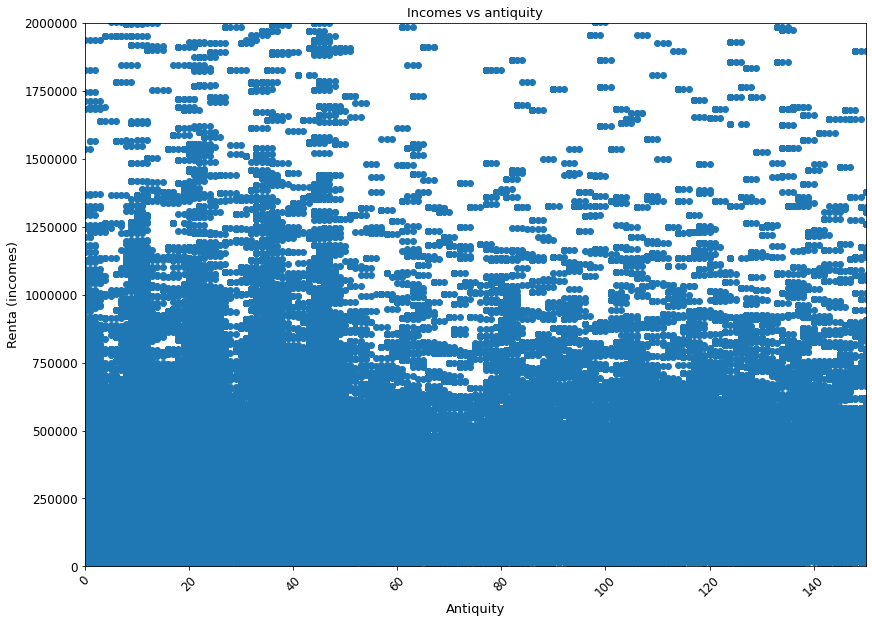

In [55]:
plt.figure(figsize=(14,10))
plt.scatter(x=dd2.antiguedad, y=dd2.renta)
plt.ylim(0, 2000000)
plt.xlim(0, 150)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Incomes vs antiquity', fontsize=13)
plt.ylabel("Renta (incomes)", fontsize=13)
plt.xlabel('Antiquity', fontsize=13)
plt.xticks(rotation=45)
plt.tick_params(axis='both', labelsize=12)
plt.savefig("incomes vs antiquity")
plt.show()

This graph does not tell us much, so we will proceed to make another type of graph.

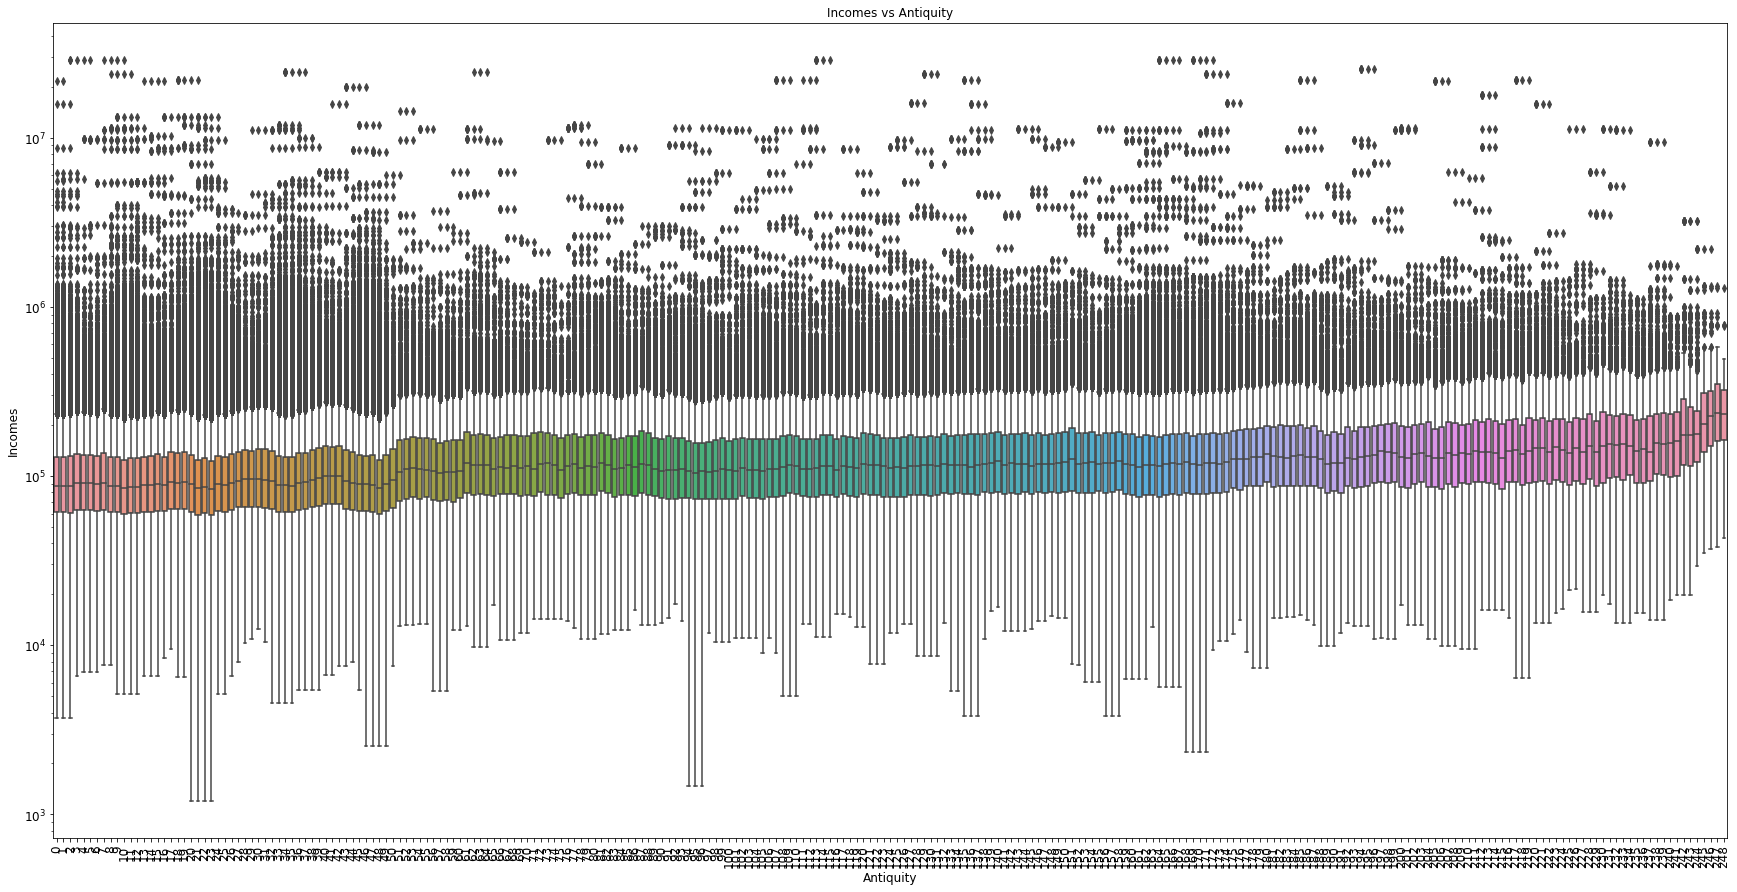

In [61]:
# # Make the plot of incomes vs age
plt.figure(figsize=(30,15))
sns.boxplot(y='renta', x='antiguedad', data=dd2)
plt.title('Incomes vs Antiquity', fontsize=12)
plt.xlabel("Antiquity", fontsize=12)
plt.ylabel("Incomes", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=.5)
plt.yscale('log')
plt.savefig("incomes vs antiquity box")
plt.show()

What we can is that almost all customers have the same median, with a little difference but not too much with other antiquities of the customers. 

In [113]:
# Createa Df group by segmente and aggregate the sum of the colum prods_by_m
df_seg = dd2.groupby(['segmento'])['prods_by_m'].agg('sum') 

In [114]:
df_seg

segmento
01 - TOP              1231392.0
02 - PARTICULARES     6777485.0
03 - UNIVERSITARIO    2656525.0
Name: prods_by_m, dtype: float64

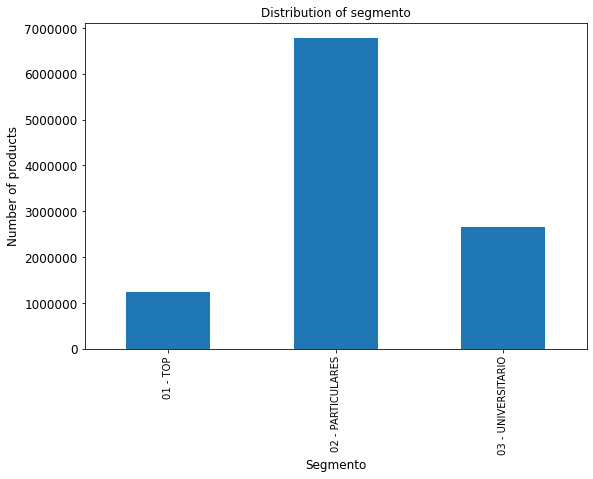

In [115]:
# Create the plot of the distribution of the clients for segmento
#plt.figure(dpi=150)
df_seg.plot(kind='bar', figsize=[9,6])
plt.title('Distribution of segmento', fontsize=12)
plt.xlabel('Segmento', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Number of products', fontsize=12)
plt.savefig('semento_1')
plt.show()

In this graph we can see that customers belonging to the INDIVIDUAL segmentation have more products and on the contrary those belonging to the TOP or VIP segmentation have fewer products.

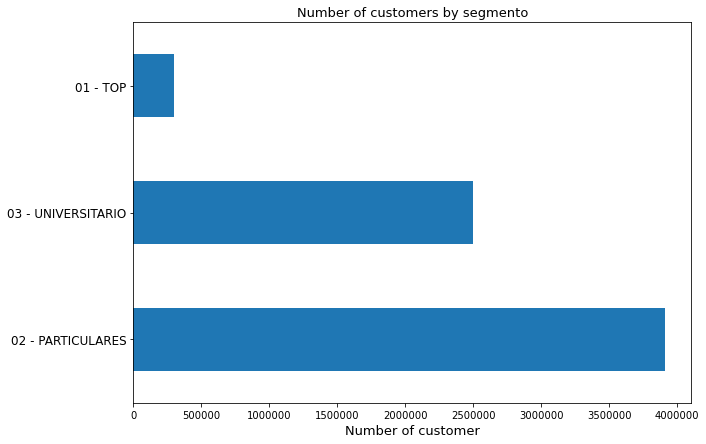

In [116]:
# Make the plot of 'Number of customers by segmento
dd2.segmento.value_counts().plot(kind='barh', figsize=[10,7])
plt.title('Number of customers by segmento', fontsize=13)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Number of customer", fontsize=13)
plt.savefig("segmento_2")
plt.show()

We can see that there are more customers in the PARTICULAR segment and on the contrary there are less customers in the TOP or VIP segment.

In [100]:
# make a plot of number of customers in different provinces (codes) for compare with the variable nomprov
# that apparently  are the same.
#dd2.cod_prov.value_counts()
plt.figure(figsize=(14, 9))
dd2.cod_prov.value_counts().plot(kind='bar')
plt.title('Number of customers in different provinces', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('', fontsize=13)
plt.savefig('cod_prov')
plt.show()

We can see that the majority of the customers are from the province that has the code with the number 28.0, and the minority are from the provincia with the code 51.0, we need to compare this graph with the variable nomprov, for whats if they are the same.

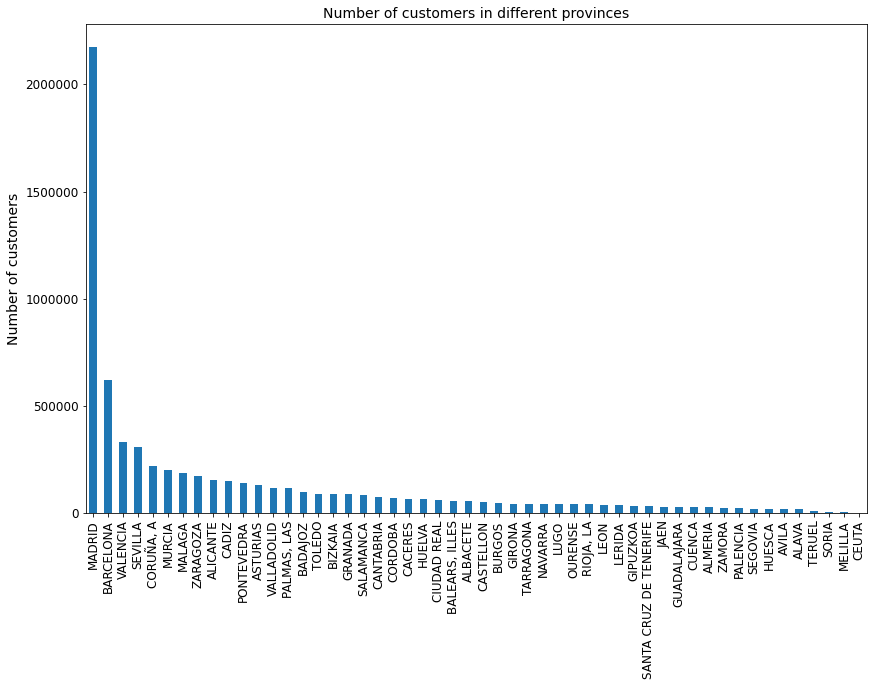

In [101]:
# make a plot of number of customers in different provinces (names)
plt.figure(figsize=(14, 9))
dd2.nomprov.value_counts().plot(kind='bar')
plt.title('Number of customers in different provinces', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('', fontsize=13)
plt.savefig('nomprov')
plt.show()

According this graph with the previus we can see that effectively are the same customers with their correspondent province, the difference as we can see is that in this case the province isn't the code, but the name of the province

esta

In [107]:
# Make the graph of type pie of active custombers vs inactive customers
plt.figure(figsize=(10, 7))
plt.title("Index of Activity", fontsize=14)
dd2.ind_actividad_cliente.value_counts().plot(kind='pie', autopct='%0.1f%%', explode=[0,0.07], colors=['purple', 'cyan'])
plt.ylabel('', fontsize=14)
plt.savefig('ind_actividad_cliente')
plt.show()

According to the previous graph there is almost the same percentage of active customers (48.9%) and inactive (51.1%) 

In [61]:
#make = dd2.nomprov.value_counts()
#plt.figure(figsize=(14, 9))
#sns.barplot(y=make.index, x=make.values, palette='rocket')
#plt.title('Number of customers by code of province', fontsize=15)
#plt.ylabel('Number of customers', fontsize=14)
#plt.tick_params(axis='both', labelsize=12)
#plt.xlabel('', fontsize=13)
#plt.show()

In [119]:
# Create a DF with only the different products
products = dd2[['ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
           'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
            'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
            'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
            'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
            'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
            'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
            'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
            'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
            'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
            'ind_viv_fin_ult1', 'ind_nomina_ult1',
            'ind_nom_pens_ult1', 'ind_recibo_ult1']]

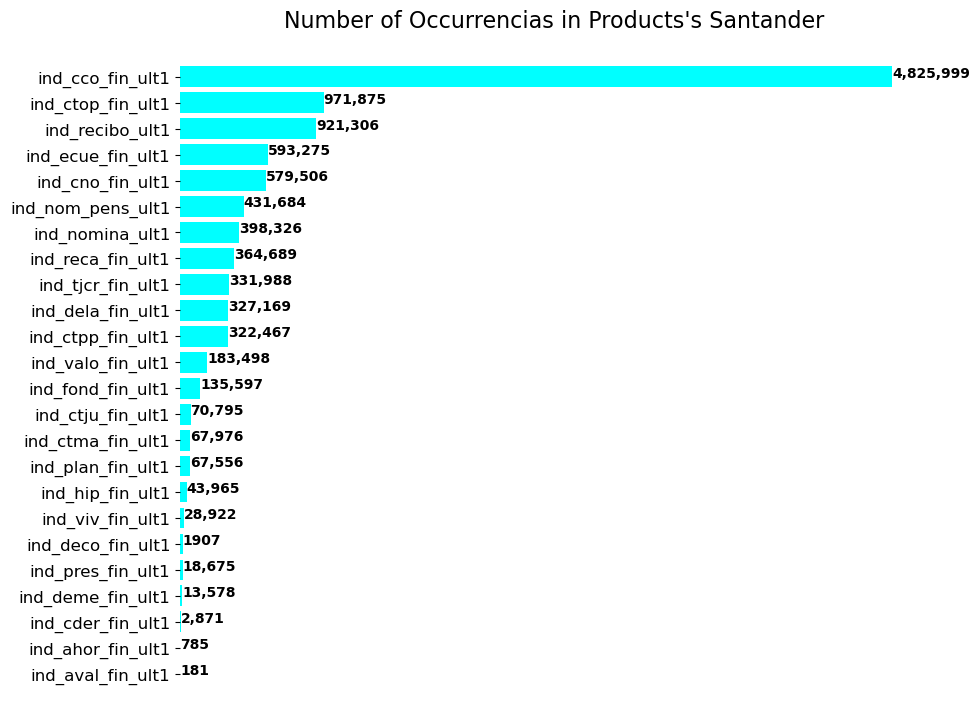

In [120]:
# Make a plot with the distribution of the products of bank
products2 = products.astype('float64').sum(axis=0).sort_values()
plt.figure(figsize=(11,9), dpi=100)
#sns.barplot(x=products2.index, y=[i for i in products2], alpha=0.8)
plt.barh(products2.index, products2.values, color='cyan')
for i, v in enumerate(products2.values):
    plt.text(v, i, f'{v:,}'.replace('.', ',').replace(',0', ''), color="black", fontweight='bold')
plt.box(False)
plt.title("Number of Occurrencias in Products's Santander", fontsize=16)
plt.subplots_adjust(left=0.22, hspace=.8)
plt.xticks([])
plt.savefig('products')
plt.show()

We can see that the most sold product is "current accounts", that is, 4,833,437 customers have 
this product compared to 181 customers who have "Guarantees" as a product.

In [65]:
# Make the boxplot of Age vs Number of Products
plt.figure(figsize=(15,10))
plt.title("Age vs Number of Products", fontsize=12)
sns.boxplot(x='prods_by_m', y='age', data=dd2, hue='sexo')
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.xlabel("Number of products", fontsize=12)
plt.savefig("boxplot age vs prods_by_m")
plt.show()

We can see that among the customers, those who have 0 products are in the older age range, that is, from 2 to 85 years old, in the case of men the median age is 39 while women with zero products have a median age of 41, on the other hand of people who have 13 products, in the case of men have an age range of 44 to 58 and a median of 45 and in women from 41 to 60 in the age range with a median of 44.

In [66]:
# Make the plot of Number of products vs Customer relation type at the beginning of the month
plt.figure(figsize=(15,10))
sns.boxplot(y='prods_by_m', x='tiprel_1mes', data=dd2, hue='sexo')
plt.title('Number of products vs Customer relation type at the beginning of the month', fontsize=12)
plt.xlabel("Type of Customer", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.savefig('boxplot prods_by_m vs tiprel_1mes')
plt.show()

In the graph we can see that both type A, P, and R customers have the same number of women and men, for type A (active) customers have a median of 2 and the minimum number of products they have is 0 with a maximum of 6, but there are some customers that belong to this category that until 10 products or more.

In [216]:
check =  dd2.groupby(['tiprel_1mes', 'sexo'])['prods_by_m'].agg(['median', 'mean']).reset_index()

In [217]:
check

tiprel_1mes sexo  median      mean
0           A    H     2.0  2.202396
1           A    V     2.0  2.457527
2           I    H     1.0  0.874199
3           I    V     1.0  0.864474
4           N    V     1.0  1.000000
5           P    H     1.0  0.665984
6           P    V     1.0  0.646476
7           R    H     1.0  0.732955
8           R    V     1.0  0.624000

In [67]:
# Make the plot of Number of products vs Customer type at the beginning of the month
plt.figure(figsize=(15,10))
sns.boxplot(y='prods_by_m', x='indrel_1mes', data=dd2, hue='sexo')
plt.title('Number of products vs Customer type at the beginning of the month', fontsize=12)
plt.xlabel("Type of Customer", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.savefig("boxplot prods_by_m vs indrel_1mes")
plt.show()

In the previous graph, we can see that the type of customer at the beginning of the month is distributed proportionally between men and women, for example customer type 1 (primary customer) has the same number of women and men and its minimum number of products is 0 and the maximum is 3. On the other hand we can see that in this category there are some customers who have more products than normal, for example some have 10, 11 or 12 products.

In [220]:
check2 = dd2.groupby(['indrel_1mes', 'sexo'])['prods_by_m'].agg(['median', 'mean']).reset_index()

In [221]:
check2

indrel_1mes sexo  median      mean
0           1    H     1.0  1.468059
1           1    V     1.0  1.688772
2           2    H     0.0  0.548936
3           2    V     1.0  0.543210
4           3    H     1.0  0.648148
5           3    V     1.0  0.645051
6           4    H     1.0  0.803571
7           4    V     1.0  0.689655
8           P    H     1.0  0.732955
9           P    V     1.0  0.626984

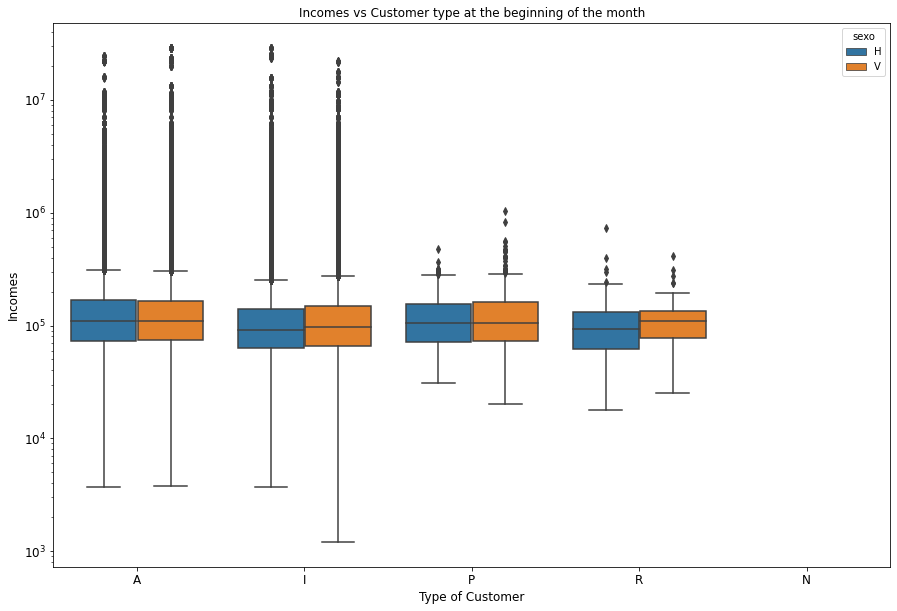

In [68]:
# Make the plot of Incomes vs Customer type at the beginning of the month
plt.figure(figsize=(15,10))
sns.boxplot(y='renta', x='tiprel_1mes', data=dd2, hue='sexo')
plt.title('Incomes vs Customer type at the beginning of the month', fontsize=12)
plt.xlabel("Type of Customer", fontsize=12)
plt.ylabel("Incomes", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.yscale('log')
plt.savefig("boxplot renta(incomes) vs tiprel_1mes")
plt.show()

In this graph we can see that we have almost the same number of female and male clients for the type of relationship with the client at the beginning of the month, we can also see that category I (inactive) is the one with the highest range of income for women, since the minimum gross household income is more than 1000 and the maximum is more than 100000.

En esta grafica podemos ver que casi se tiene el mismo numero de clientes mujeres y hombres para el tipo de relación con el cliente a principios de mes, tambien podemos ver que la catgeoria I (inactive) es el que tiene un rango mayor en los ingresos para las mujeres, ya que el minimo de ingresos brutos en el hogar es de más de 1000 y el maximo es más de 100000

In [210]:
a = dd2.groupby(['tiprel_1mes', 'sexo'])['renta'].agg(['median', 'mean']).reset_index()

In [211]:
a

tiprel_1mes sexo      median           mean
0           A    H  108766.680  142235.135034
1           A    V  109594.230  141578.065065
2           I    H   91438.830  122440.872197
3           I    V   97193.550  128709.200810
4           N    V         NaN            NaN
5           P    H  104661.135  122870.605788
6           P    V  104936.850  132762.340677
7           R    H   92355.480  112311.970374
8           R    V  109506.750  120243.637119

In [69]:
# Make the plot of Number of products vs Customer relation type at the beginning of the month
plt.figure(figsize=(15,10))
sns.boxplot(y='renta', x='segmento', data=dd2, hue='sexo')
plt.title('Number of products vs Customer relation type at the beginning of the month', fontsize=12)
plt.xlabel("Type of Customer", fontsize=12)
plt.ylabel("Incomes", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.yscale('log')
plt.savefig("boxplot renta vs segmento")
plt.show()

In this graph we can see that in the segmentation of customers we can see that there is not much difference between the gross income of men and women, we can also see that there is not much difference in gross household income with the different segmentations, on the other hand the segmentation of UNIVERSITY is where women have a lower income.

In [212]:
b = dd2.groupby(['segmento', 'sexo'])['renta'].agg(['median', 'mean']).reset_index()

In [213]:
b

segmento sexo      median           mean
0            01 - TOP    H  146547.150  181857.201576
1            01 - TOP    V  138903.510  172981.006534
2   02 - PARTICULARES    H  110094.450  144536.903135
3   02 - PARTICULARES    V  107131.110  139615.978457
4  03 - UNIVERSITARIO    H   85707.975  112379.252254
5  03 - UNIVERSITARIO    V   91467.330  119389.496063

In [70]:
plt.figure(figsize=(15,10))
sns.boxplot(y='renta', x='indrel_1mes', data=dd2, hue='sexo')
plt.title('Incomes vs Customer type at the beginning of the month', fontsize=12)
plt.xlabel("Type of Customer", fontsize=12)
plt.ylabel("Incomes", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.yscale('log')
plt.savefig("boxplot renta(incomes) vs indrel_1mes")
plt.show()

In this graph we can see that for almost all categories both men and women have the same number of gross income, except for the types of customer 4 (former co-owner) and P (Potential) that we can see a difference more notable. On the other hand we can see that there are some customers belonging to type 1 (primary customer) that have an income higher than the range of the category for both men and women.

In [214]:
c = dd2.groupby(['indrel_1mes', 'sexo'])['renta'].agg(['median', 'mean']).reset_index()

In [215]:
c

indrel_1mes sexo     median           mean
0           1    H   98868.30  131435.025919
1           1    V  103703.16  135452.586577
2           2    H  112363.14  148516.770000
3           2    V  109929.15  142463.633936
4           3    H  102692.46  122266.211839
5           3    V  103593.63  132289.992445
6           4    H  123012.99  127959.212903
7           4    V  123560.34  145856.883333
8           P    H   92355.48  112311.970374
9           P    V  109506.75  120243.637119

In [240]:
#plt.figure(figsize=(11,7))
#plt.scatter(x=dd2.prods_by_m, y=dd2.renta)
#plt.ticklabel_format(style='plain', axis='y')
#plt.title('Incomes vs Number of products', fontsize=13)
#plt.ylabel("Renta (incomes)", fontsize=13)
#plt.xlabel('Number of Products', fontsize=13)
#plt.tick_params(axis='both', labelsize=12)
#plt.show()

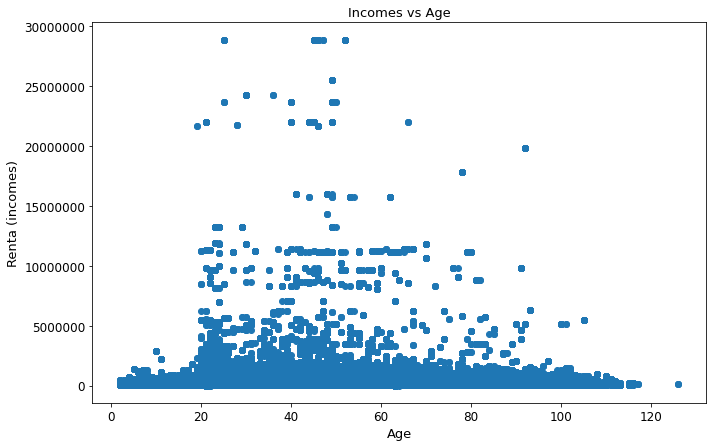

In [71]:
plt.figure(figsize=(11,7))
plt.scatter(x=dd2.age, y=dd2.renta)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Incomes vs Age', fontsize=13)
plt.ylabel("Renta (incomes)", fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.tick_params(axis='both', labelsize=12)
plt.show()

This graph does not tell us much, so we will proceed to make another type of graph.

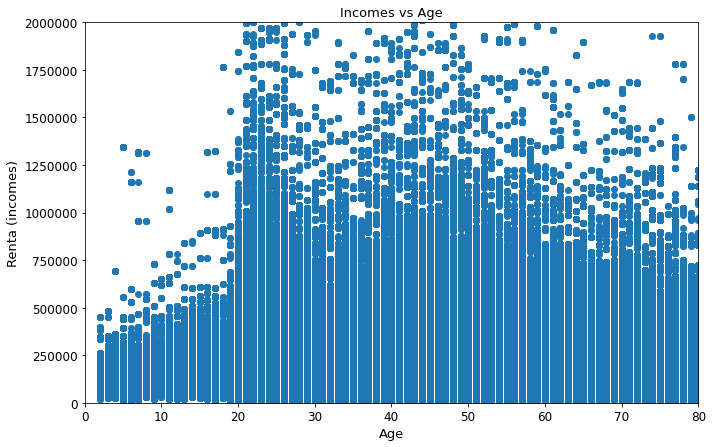

In [62]:
# Make the plot of incomes vs age
plt.figure(figsize=(11,7))
plt.scatter(x=dd2.age, y=dd2.renta)
plt.ylim(0, 2000000)
plt.xlim(0, 80)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Incomes vs Age', fontsize=13)
plt.ylabel("Renta (incomes)", fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.tick_params(axis='both', labelsize=12)
plt.savefig('incomes vs age')
plt.show()

This graph does not tell us much, so we will proceed to make another type of graph.

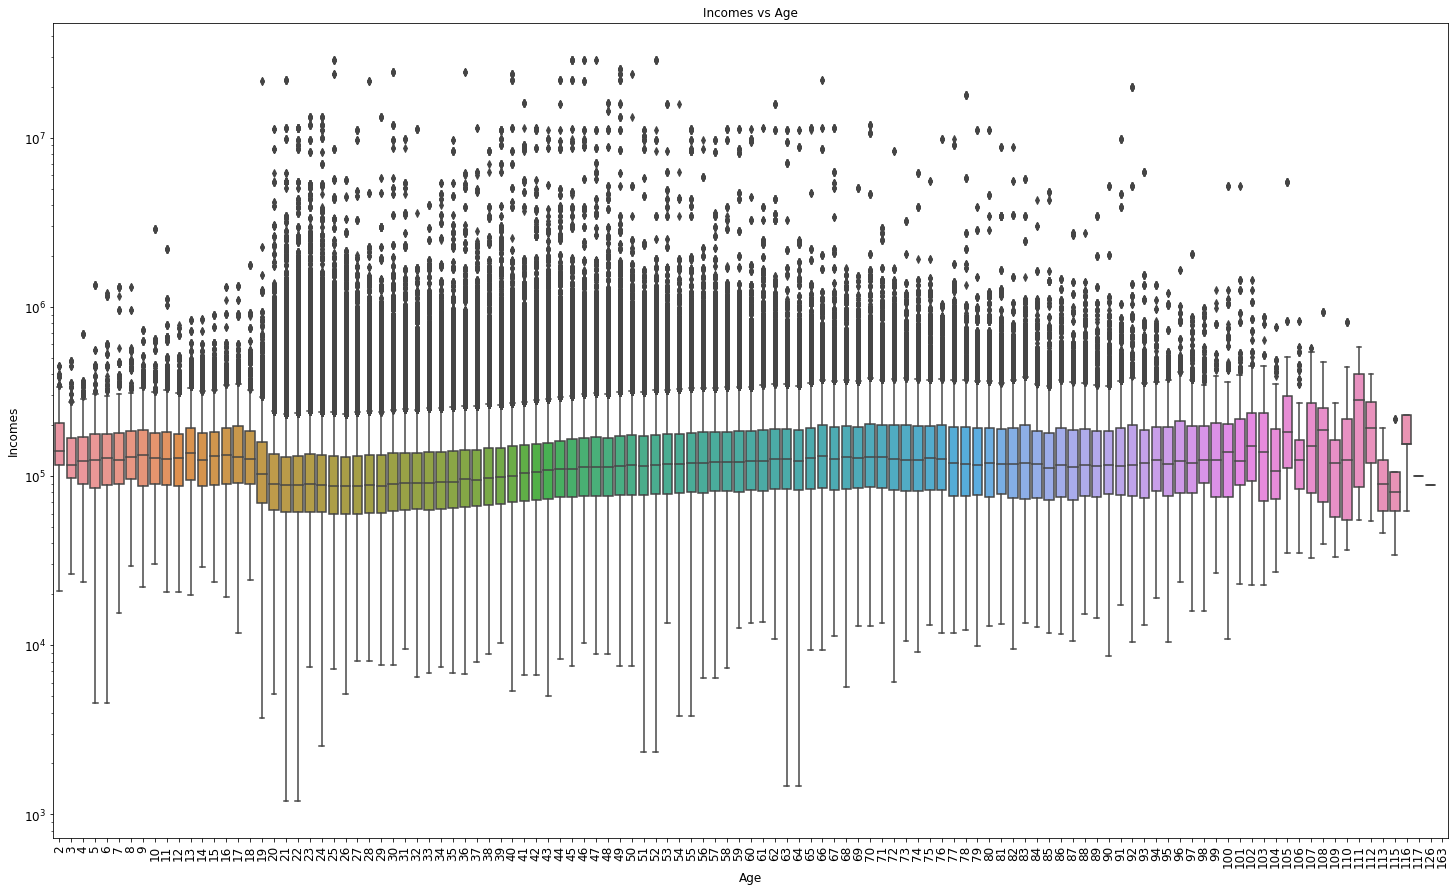

In [64]:
# # Make the plot of incomes vs age
plt.figure(figsize=(25,15))
sns.boxplot(y='renta', x='age', data=dd2)
plt.title('Incomes vs Age', fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Incomes", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.xticks(rotation=90)
plt.yscale('log')
plt.savefig('incomes vs age box')
plt.show()

In this graph we can see that perhaps there are some errors because there are customers from 2 to 15 years who have incomes of more than 100,000, on the other hand from customers from 20 years to 100 we can see that they have the same median of incomes.

cuantos ganan menor cantidad de dinero (grafica)

In [72]:
# create a new DF for the future plot with the sexo (H, V) as columns and the products as index
dd3 = dd2.loc[:, ['sexo']].join(dd1.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"])
dd3 = dd3.groupby(['sexo']).sum()
dd3 = dd3.T

In [73]:
# see the result of the previuos
dd3.head()

sexo                       H          V
ind_ahor_fin_ult1      198.0      587.0
ind_aval_fin_ult1       51.0      130.0
ind_cco_fin_ult1   2261917.0  2564075.0
ind_cder_fin_ult1      401.0     2470.0
ind_cno_fin_ult1    236153.0   343353.0

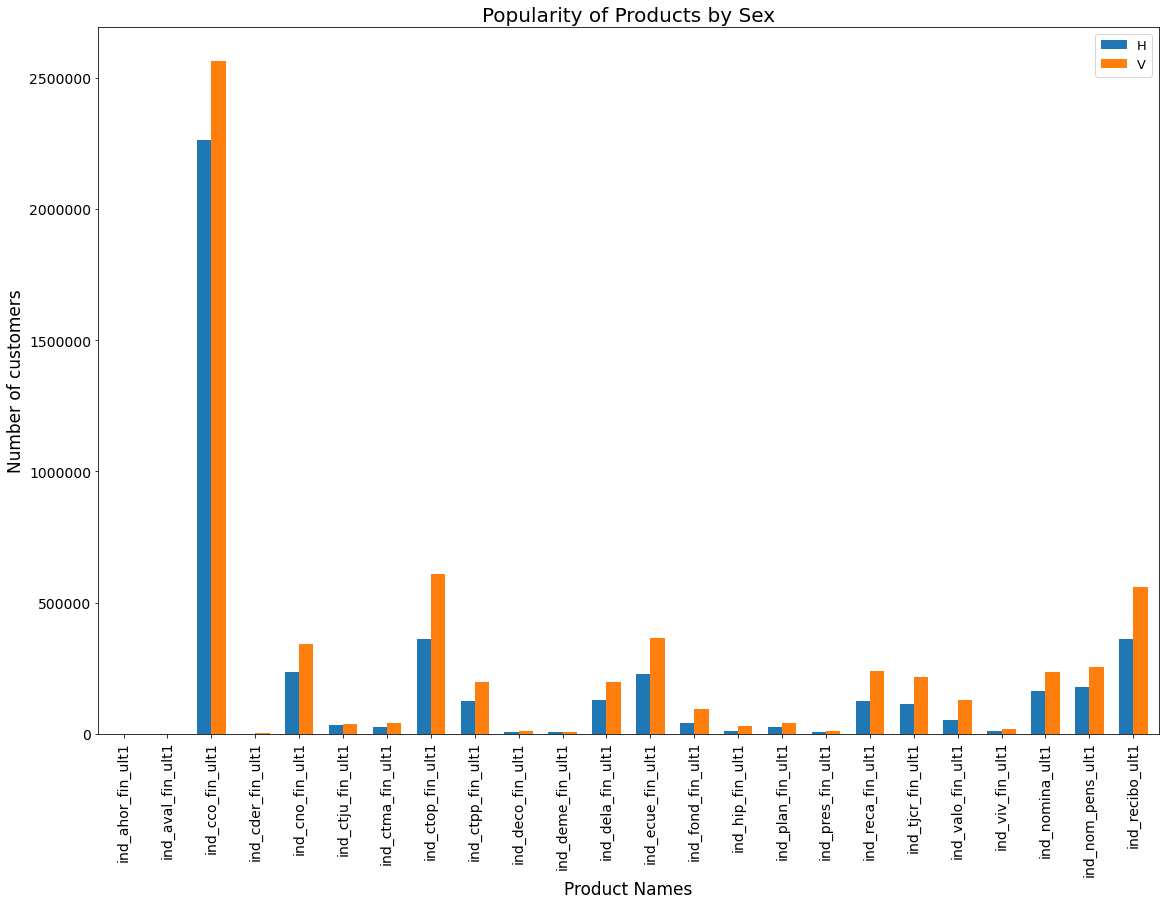

In [74]:
# Make a plot of the distribution of the products beetwen H and V
dd3.plot(kind='bar', fontsize=14, figsize=[19,13], width=.65)
#plt.bar(dd3.index, dd3.H.values)
#plt.bar(dd3.index, dd3.V.values)
plt.title('Popularity of Products by Sex', fontsize=20)
plt.xlabel('Product Names', fontsize=17) 
plt.ylabel('Number of customers', fontsize=17)
plt.ticklabel_format(style='plain', axis='y')
plt.legend( prop={'size':13})
plt.savefig("products by sex")
plt.show()

This graph is similar to the previous one, but the difference is that the products are divided between men and women. We can see that most of the products are dominated by women compared to men.

In [93]:
# Convert age colum in numerical colums
#dd2['age'] = pd.to_numeric(dd2.age, errors='coerce')

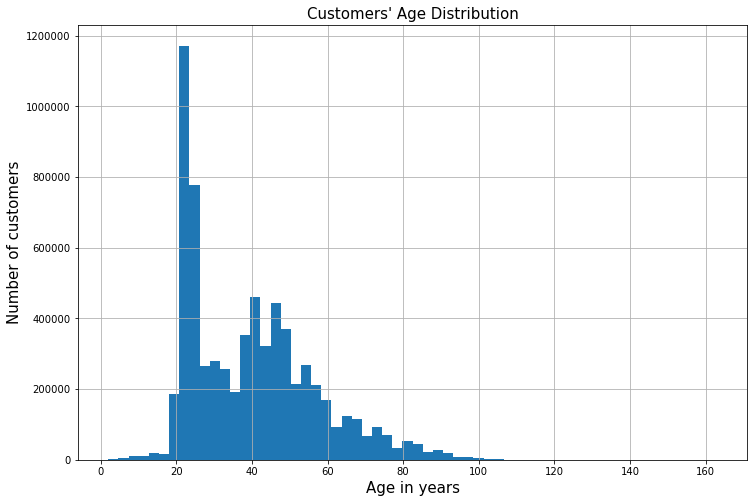

In [94]:
# Create the histogram of number of customers by the age in years 
dd2['age'].hist(bins=60, figsize=(12,8))
plt.title("Customers' Age Distribution", fontsize=15)
plt.xlabel("Age in years", fontsize=15)
plt.ylabel("Number of customers", fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

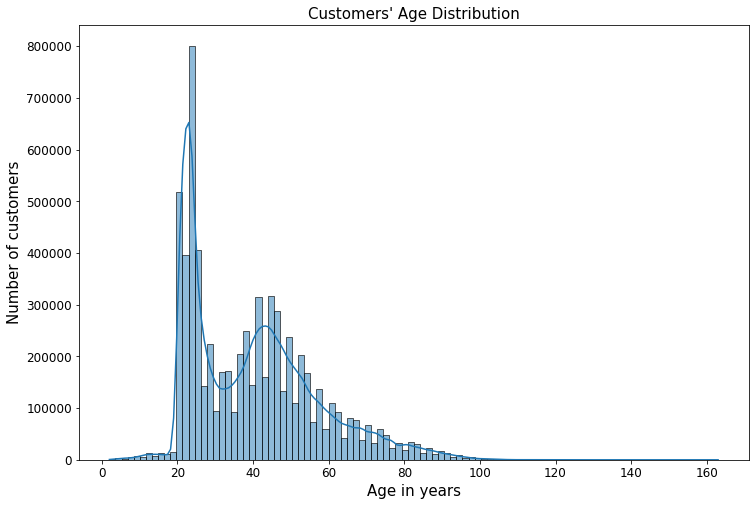

In [75]:
# Create the histogram of number of customers by the age in years 
plt.figure(figsize=(12,8))
sns.histplot(dd2['age'], bins=100, kde=True)
plt.title("Customers' Age Distribution", fontsize=15)
plt.xlabel("Age in years", fontsize=15)
plt.ylabel("Number of customers", fontsize=15)
plt.tick_params(axis='both', labelsize=12)
plt.savefig("Histograma de numero de clientes vs age")
plt.show()

We have a bimodal distribution, which is interesting because most of the customers are between 20 and 30 years old, so we can say that they are a young group, but there is another group with a majority of customers between 40 and 50 years old.

In [76]:
# Group by variable renta but in intervals, and summ the other colums
df_gi = dd2.groupby(pd.cut(dd2['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum()

In [77]:
df_gi.head()

ncodpers       age  ind_nuevo  antiguedad  \
renta                                                                  
[0.0, 60000.0)         946744141206  36396522    42755.0    60643083   
[60000.0, 120000.0)   2034047760350  92877988    85364.0   174423665   
[120000.0, 180000.0)   859290849203  48858549    32628.0   104419963   
[180000.0, 240000.0)   345426294728  22708453    12093.0    51301100   
[240000.0, inf)        338170001630  23813093    10839.0    54318355   

                         indrel    tipodom    cod_prov  ind_actividad_cliente  \
renta                                                                           
[0.0, 60000.0)        1035545.0  1010947.0  26747685.0               420194.0   
[60000.0, 120000.0)   2446381.0  2391403.0  64569021.0              1158770.0   
[120000.0, 180000.0)  1184578.0  1161842.0  30390315.0               630596.0   
[180000.0, 240000.0)   522222.0   512520.0  13372768.0               291959.0   
[240000.0, inf)        529801.0   521079.0  13239669.0               288790.0   

                             renta  ind_ahor_fin_ult1  ...  ind_plan_fin_ult1  \
renta                                                  ...                      
[0.0, 60000.0)        4.608032e+10                 65  ...               4420   
[60000.0, 120000.0)   2.093324e+11                143  ...              17907   
[120000.0, 180000.0)  1.693633e+11                207  ...              15958   
[180000.0, 240000.0)  1.056051e+11                137  ...               9770   
[240000.0, inf)       2.169630e+11                142  ...              11414   

                      ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
renta                                                                           
[0.0, 60000.0)                     4098              34737              28641   
[60000.0, 120000.0)                7209             114603             105723   
[120000.0, 180000.0)               2398              79128              75900   
[180000.0, 240000.0)                808              43272              39178   
[240000.0, inf)                     873              50742              39476   

                      ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  \
renta                                                                        
[0.0, 60000.0)                    12574              2239          45545.0   
[60000.0, 120000.0)               49868              8640         138527.0   
[120000.0, 180000.0)              40283              6671          88007.0   
[180000.0, 240000.0)              24556              3656          41978.0   
[240000.0, inf)                   28599              4407          37184.0   

                      ind_nom_pens_ult1  ind_recibo_ult1  prods_by_m  
renta                                                                 
[0.0, 60000.0)                  48973.0           113928   1355683.0  
[60000.0, 120000.0)            148845.0           323671   3672513.0  
[120000.0, 180000.0)            94858.0           187304   2069580.0  
[180000.0, 240000.0)            45943.0            87962    985802.0  
[240000.0, inf)                 42116.0            88166    990833.0  

[5 rows x 34 columns]

In [78]:
# Of the previous Df I select only the variables of the products
df_gi = df_gi.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
# apply the transposed of the DF
df_gi = df_gi.T

In [79]:
# Show the DF
df_gi.head()

renta              [0.0, 60000.0)  [60000.0, 120000.0)  [120000.0, 180000.0)  \
ind_ahor_fin_ult1            65.0                143.0                 207.0   
ind_aval_fin_ult1             6.0                 34.0                  34.0   
ind_cco_fin_ult1         759894.0            1727447.0              790443.0   
ind_cder_fin_ult1           329.0                793.0                 616.0   
ind_cno_fin_ult1          67592.0             201060.0              123868.0   

renta              [180000.0, 240000.0)  [240000.0, inf)  
ind_ahor_fin_ult1                 137.0            142.0  
ind_aval_fin_ult1                  62.0             36.0  
ind_cco_fin_ult1               338308.0         342456.0  
ind_cder_fin_ult1                 364.0            333.0  
ind_cno_fin_ult1                59411.0          56275.0

In [81]:
# Make the plot of Distribution of products among customers by income group
df_gi.plot(kind='bar', fontsize=14, figsize=[18,12], width=.8)
plt.title('Distribution of products among customers by income group', fontsize=18)
plt.ylabel('Number of products', fontsize=17)
plt.xlabel('Products', fontsize=17)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig("producst by income groups")
plt.show()

We can see from the above graph that the income range of 60000.0 to 120000.0 dominates among the different products.

In [82]:
# we ignore the products: ind_ahor_fin_ult1", 'ind_aval_fin_ult1', 'ind_cder_fin_ult1 because have a little values
df_gi2 = df_gi.drop(["ind_ahor_fin_ult1", 'ind_aval_fin_ult1', 'ind_cder_fin_ult1'])

In [83]:
# Make the plot of Distribution of products among customers by income group
df_gi2.plot(kind='bar', fontsize=14, figsize=[18,12], width=.8)
plt.title('Distribution of products among customers by income group', fontsize=18)
plt.ylabel('Number of products', fontsize=17)
plt.xlabel('Products', fontsize=17)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig("products by income groups 2")
plt.show()

This graph is the same as the previous one, but with the difference that the products that were not outstanding or almost non-existent were removed, in order to observe the relevance of the other products. The income from 60000 to 120000 is the one that predominates in the different products.

Esta grafica es igual a la anterior, pero con la diferencia que se quitaron los productos que no eran sobresalientes o eran pocos, con el fin de observar la relevancia de los otros productos. Los ingresos de 60000 a 120000 es el que predomina en los distintos productos.

In [85]:
# we ignore the product ind_cco_fin_ult1, because is the Dominator product 
df_gi3 = df_gi2.drop('ind_cco_fin_ult1')

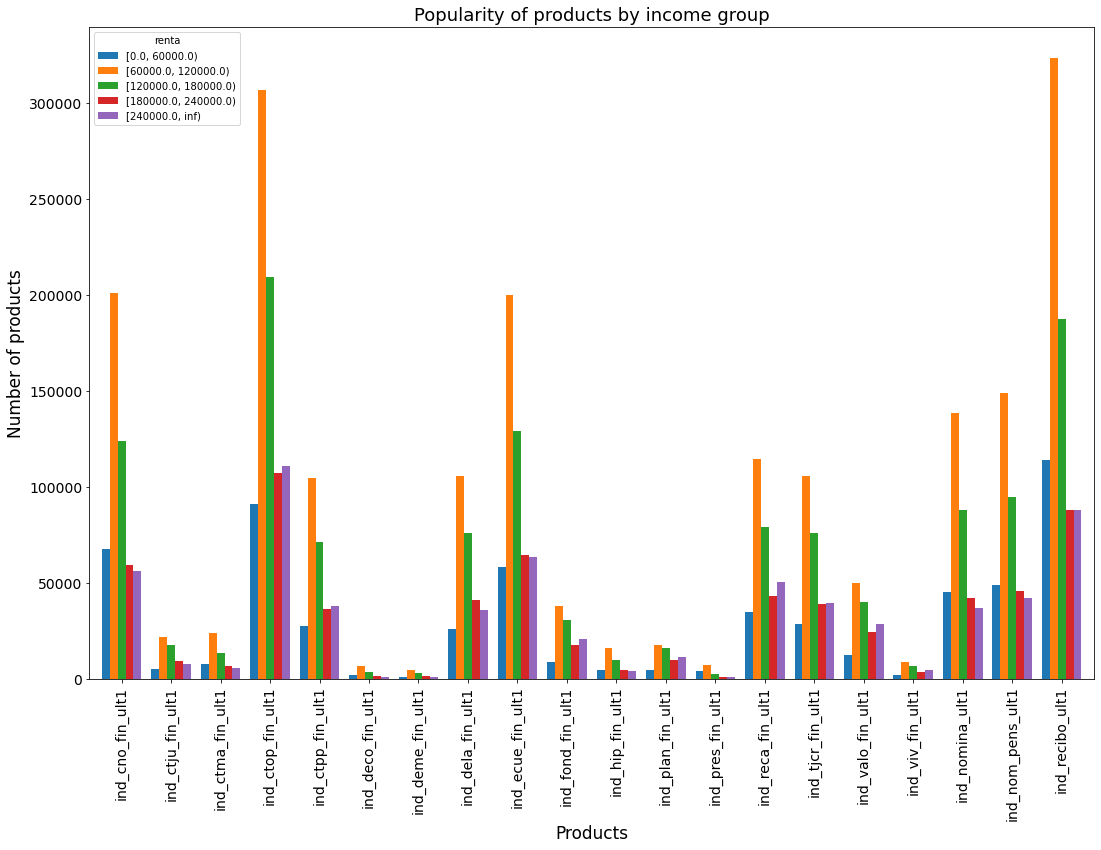

In [86]:
# Make the plot of Popularity of products by income group
df_gi3.plot(kind='bar', fontsize=14, figsize=[18,12], width=.8)
plt.title('Popularity of products by income group', fontsize=18)
plt.ylabel('Number of products', fontsize=17)
plt.xlabel('Products', fontsize=17)
plt.savefig("products by incomes groups 3")
plt.show()

If we ignore ind_cco_fin_ult1 as the dominating product, it is quickly noticed that the next most frequently occurring product is ind_ctop_fin_ult1, but again it is noticed that the range 60000.0 to 120000.0 is the dominating product.

In [87]:
# Create a Df where we have the column age and the products
df_dap = dd2.loc[:, ['age']].join((dd2.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1']))

In [88]:
df_dap

age  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  \
0         35                  0                  0                 1   
1         23                  0                  0                 1   
2         23                  0                  0                 1   
3         22                  0                  0                 0   
4         23                  0                  0                 1   
...      ...                ...                ...               ...   
6823649   71                  0                  0                 0   
6823650   41                  0                  0                 0   
6823651   37                  0                  0                 1   
6823652   33                  0                  0                 1   
6823653   57                  0                  0                 1   

         ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  \
0                        0                 0                  0   
1                        0                 0                  0   
2                        0                 0                  0   
3                        0                 0                  0   
4                        0                 0                  0   
...                    ...               ...                ...   
6823649                  0                 0                  0   
6823650                  0                 1                  0   
6823651                  0                 0                  0   
6823652                  0                 0                  0   
6823653                  0                 0                  0   

         ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ...  \
0                        0                  0                  0  ...   
1                        0                  0                  0  ...   
2                        0                  0                  0  ...   
3                        0                  0                  0  ...   
4                        0                  0                  0  ...   
...                    ...                ...                ...  ...   
6823649                  0                  0                  0  ...   
6823650                  0                  1                  0  ...   
6823651                  0                  0                  0  ...   
6823652                  0                  1                  0  ...   
6823653                  0                  0                  0  ...   

         ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  \
0                       0                  0                  0   
1                       0                  0                  0   
2                       0                  0                  0   
3                       0                  0                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
6823649                 0                  0                  0   
6823650                 0                  0                  0   
6823651                 0                  0                  0   
6823652                 0                  0                  0   
6823653                 0                  0                  0   

         ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  \
0                        0                  0                  0   
1                        0                  0                  0   
2                        0                  0                  0   
3                        0                  0                  0   
4                        0                  0                  0   
...                    ...                ...                ...   
6823649                  0                  0                  0   
6823650                  0                  0                  0   
6823651                  0                  0

In [89]:
# create a dictionary that with the columns as key and the word sum as values (for the previous Df created), for apply in the columns
# only ignore the column age 
fnc = {c:'sum' for c in df_dap.columns.drop(['age']).tolist()}

In [90]:
# Create a new Df group by the age and apply the previous dictionary created (the sum in each column)
df_agpr = df_dap.groupby('age').agg(fnc)

In [91]:
# drop the column 
#df_agpr.drop('age', axis=1)

In [92]:
df_agpr

ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  \
age                                                           
2                    0                  0                 1   
3                    0                  0                 1   
4                    0                  0                10   
5                    0                  0                 0   
6                    0                  0                 0   
..                 ...                ...               ...   
115                  0                  0                57   
116                  0                  0                12   
117                  0                  0                 0   
126                  0                  0                 0   
163                  0                  0                 0   

     ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  \
age                                                           
2                    0                 0                275   
3                    0                 0                739   
4                    0                 0               1162   
5                    0                 0               1594   
6                    0                 0               1892   
..                 ...               ...                ...   
115                  0                 0                  0   
116                  0                 0                  0   
117                  0                 0                  0   
126                  0                 0                  0   
163                  0                 0                  0   

     ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  \
age                                                            
2                    0                  0                  0   
3                    1                  0                  0   
4                    0                  0                  0   
5                    0                  0                  0   
6                    0                  0                  0   
..                 ...                ...                ...   
115                  0                 39                 10   
116                  0                 20                  0   
117                  0                  0                  0   
126                  0                  0                  0   
163                  0                  0                  0   

     ind_deco_fin_ult1  ...  ind_hip_fin_ult1  ind_plan_fin_ult1  \
age                     ...                                        
2                    0  ...                18                  0   
3                    0  ...                 0                  0   
4                    0  ...                 0                  0   
5                    0  ...                 0                  0   
6                    0  ...                 0                  0   
..                 ...  ...               ...                ...   
115                  0  ...                 0                  0   
116                  0  ...                 0                  0   
117                  0  ...                 0                  0   
126                  0  ...                 0                  0   
163                  0  ...                 0                  0   

     ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
age                                                            
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   
5                    0                  0                  0   
6                    0                  0                  0   
..                 ...                ...                ...   
115                  0                 10                  0   
116                  0                  0                  0   
117    

In [94]:
df_agpr.plot(kind='bar', stacked=True, fontsize=14, figsize=[42,20], colormap='nipy_spectral')
plt.title('Products distribution by age and products', fontsize=20)
plt.ylabel('Total number of customers', fontsize=17)
plt.xlabel('Age in years', fontsize=17)
plt.savefig("Products distribution by age and products")
plt.show()

We can see that among customers between 20 and 28 years of age, the product ind_cco_fin_ult1 (Current Accounts) predominates, while in the 40 to 50 years age group, ind_cco_fin_ult1 (Current Account), ind_ctop_fin_ult1 (particular Account) and ind_recibo_ult1 (Direct Debit) predominate.

## Cleaning 

In [16]:
mean_renta = dd2['renta'].mean()

In [17]:
# fill the missing values of renta with the mean
dd2['renta'] = dd2.renta.fillna(mean_renta)

In [18]:
dd2['segmento'] = dd2.segmento.fillna('02 - PARTICULARES')

In [19]:
fill_list = ['H', 'V']

In [20]:
#get mask of NaNs
m = dd2['sexo'].isnull()
#count rows with NaNs
l = m.sum()
#create array with size l
s = np.random.choice(fill_list, size=l)
#set NaNs values
dd2.loc[m, 'sexo'] = s

In [21]:
# drop the column cod_prov because is the same that nomprov
dd2 = dd2.drop('cod_prov', axis=1)

In [22]:
# Create the list to fill aleatory
fill_list2 = ['1', '3', '2', 'P', '4']

#get mask of NaNs
m2 = dd2['indrel_1mes'].isnull()
#count rows with NaNs
l2 = m2.sum()
#create array with size l
s2 = np.random.choice(fill_list2, size=l2)
#set NaNs values
dd2.loc[m2, 'indrel_1mes'] = s2

In [23]:
# Create the list to fill aleatory
fill_list3 = ['I', 'A', 'P', 'R']

#get mask of NaNs
m3 = dd2['tiprel_1mes'].isnull()
#count rows with NaNs
l3 = m3.sum()
#create array with size l3
s3 = np.random.choice(fill_list3, size=l3)
#set NaNs values
dd2.loc[m3, 'tiprel_1mes'] = s3

In [24]:
# Create the list to fill aleatory
fill_list4 = dd2.canal_entrada.unique().tolist()
fill_list4.remove(np.nan)

#get mask of NaNs
m4 = dd2['canal_entrada'].isnull()
#count rows with NaNs
l4 = m4.sum()
#create array with size l3
s4 = np.random.choice(fill_list4, size=l4)
#set NaNs values
dd2.loc[m4, 'canal_entrada'] = s4

In [25]:
# Create the list to fill aleatory
fill_list5 = dd2.nomprov.unique().tolist()
fill_list5.remove(np.nan)

#get mask of NaNs
m5 = dd2['nomprov'].isnull()
#count rows with NaNs
l5 = m5.sum()
#create array with size l3
s5 = np.random.choice(fill_list5, size=l5)
#set NaNs values
dd2.loc[m5, 'nomprov'] = s5

In [26]:
#dd2 = dd2.drop('conyuemp', axis=1)

In [30]:
dd2.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado                   0
pais_residencia                0
sexo                           0
age                            0
fecha_alta                     0
ind_nuevo                      0
antiguedad                     0
indrel                         0
ult_fec_cli_1t           6785141
indrel_1mes                    0
tiprel_1mes                    0
indresi                        0
indext                         0
canal_entrada                  0
indfall                        0
tipodom                        0
nomprov                        0
ind_actividad_cliente          0
renta                          0
segmento                       0
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_fin_ult1              0
ind_ctop_fin_ult1              0
ind_ctpp_f

In [29]:
# fill with no the missing values 
dd2.ult_fec_cli_1t = dd2.ult_fec_cli_1t.fillna('no')

In [30]:
# replace with yes where was dates 
dd2.loc[dd2.ult_fec_cli_1t != 'no', 'ult_fec_cli_1t'] = 'yes'

In [31]:
dd2.shape

(6795919, 47)

In [32]:
#dd2["ult_fec_cli_1t"] = dd2.ult_fec_cli_1t.map({''})

In [33]:
df_model = dd2.drop(["fecha_dato", 'fecha_alta', 'indfall', 'tipodom'], axis=1)

In [37]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6795919 entries, 0 to 6823653
Data columns (total 43 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ncodpers               int64  
 1   ind_empleado           object 
 2   pais_residencia        object 
 3   sexo                   object 
 4   age                    int64  
 5   ind_nuevo              float64
 6   antiguedad             int64  
 7   indrel                 float64
 8   ult_fec_cli_1t         object 
 9   indrel_1mes            object 
 10  tiprel_1mes            object 
 11  indresi                object 
 12  indext                 object 
 13  canal_entrada          object 
 14  nomprov                object 
 15  ind_actividad_cliente  float64
 16  renta                  float64
 17  segmento               object 
 18  ind_ahor_fin_ult1      int64  
 19  ind_aval_fin_ult1      int64  
 20  ind_cco_fin_ult1       int64  
 21  ind_cder_fin_ult1      int64  
 22  ind_cno_fin_ult1  

In [29]:
df_model.isnull().sum()

ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_pres_fin_ult1        0
ind_reca_fin_ult1        0
ind_tjcr_fin_ult1        0
i

In [34]:
# convert the variable indrel in string 
df_model.indrel = df_model.indrel.astype(str)

In [35]:
# create the list with the variables to make one hot encodig
columns_encoding = ['ind_empleado', 'pais_residencia', 'sexo', 'indrel',
                    'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'nomprov', 'segmento']

In [36]:
# create the catgorical variables as dummies 
df_model = pd.get_dummies(df_model, columns=columns_encoding)

In [37]:
# the new dataset with one hot encoding 
df_model.head()

ncodpers  age  ind_nuevo  antiguedad  ind_actividad_cliente          renta  \
0   1375586   35        0.0           6                    1.0   87218.100000   
1   1050611   23        0.0          35                    0.0   35548.740000   
2   1050612   23        0.0          35                    0.0  122179.110000   
3   1050613   22        0.0          35                    0.0  119775.540000   
4   1050614   23        0.0          35                    1.0  133506.965672   

   ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  \
0                  0                  0                 1                  0   
1                  0                  0                 1                  0   
2                  0                  0                 1                  0   
3                  0                  0                 0                  0   
4                  0                  0                 1                  0   

   ...  nomprov_TARRAGONA  nomprov_TERUEL  nomprov_TOLEDO  nomprov_VALENCIA  \
0  ...                  0               0               0                 0   
1  ...                  0               0               0                 0   
2  ...                  0               0               0                 0   
3  ...                  0               0               0                 0   
4  ...                  0               0               0                 0   

   nomprov_VALLADOLID  nomprov_ZAMORA  nomprov_ZARAGOZA  segmento_01 - TOP  \
0                   0               0                 0                  0   
1                   0               0                 0                  0   
2                   0               0                 0                  0   
3                   0               0                 1                  0   
4                   0               0                 1                  0   

   segmento_02 - PARTICULARES  segmento_03 - UNIVERSITARIO  
0                           1                            0  
1                           0                            1  
2                           0                            1  
3                           0                            1  
4                           0                            1  

[5 rows x 386 columns]

In [34]:
# shape of the dataset with dummies 
df_model.shape

(6795919, 386)

## Dataframe for Market Basket Analysis

In [49]:
# choose the selected columns 
columns = ['ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

In [50]:
# Create the dataset for market basket analysis 
df_market = dd2[columns]

In [51]:
# shape of the dataset
df_market.shape

(6795919, 25)

In [52]:
# watch the data 
df_market.head()

ncodpers  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  \
0   1375586                  0                  0                 1   
1   1050611                  0                  0                 1   
2   1050612                  0                  0                 1   
3   1050613                  0                  0                 0   
4   1050614                  0                  0                 1   

   ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  \
0                  0                 0                  0                  0   
1                  0                 0                  0                  0   
2                  0                 0                  0                  0   
3                  0                 0                  0                  0   
4                  0                 0                  0                  0   

   ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ...  ind_hip_fin_ult1  \
0                  0                  0  ...                 0   
1                  0                  0  ...                 0   
2                  0                  0  ...                 0   
3                  0                  0  ...                 0   
4                  0                  0  ...                 0   

   ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  \
0                  0                 0              0.0                0.0   
1                  0                 0              0.0                0.0   
2                  0                 0              0.0                0.0   
3                  0                 0              0.0                0.0   
4                  0                 0              0.0                0.0   

   ind_recibo_ult1  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 25 columns]

In [54]:
# Change as int the next columns
df_market.ind_nomina_ult1 = df_market.ind_nomina_ult1.astype(np.int64)
df_market.ind_nom_pens_ult1 = df_market.ind_nom_pens_ult1.astype(np.int64)

In [55]:
df_market.isnull().sum()

ncodpers             0
ind_ahor_fin_ult1    0
ind_aval_fin_ult1    0
ind_cco_fin_ult1     0
ind_cder_fin_ult1    0
ind_cno_fin_ult1     0
ind_ctju_fin_ult1    0
ind_ctma_fin_ult1    0
ind_ctop_fin_ult1    0
ind_ctpp_fin_ult1    0
ind_deco_fin_ult1    0
ind_deme_fin_ult1    0
ind_dela_fin_ult1    0
ind_ecue_fin_ult1    0
ind_fond_fin_ult1    0
ind_hip_fin_ult1     0
ind_plan_fin_ult1    0
ind_pres_fin_ult1    0
ind_reca_fin_ult1    0
ind_tjcr_fin_ult1    0
ind_valo_fin_ult1    0
ind_viv_fin_ult1     0
ind_nomina_ult1      0
ind_nom_pens_ult1    0
ind_recibo_ult1      0
dtype: int64

In [56]:
# save as csv
#df_market.to_csv('df_market.csv', index=False)

In [57]:
# info for df market
df_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6795919 entries, 0 to 6823653
Data columns (total 25 columns):
 #   Column             Dtype
---  ------             -----
 0   ncodpers           int64
 1   ind_ahor_fin_ult1  int64
 2   ind_aval_fin_ult1  int64
 3   ind_cco_fin_ult1   int64
 4   ind_cder_fin_ult1  int64
 5   ind_cno_fin_ult1   int64
 6   ind_ctju_fin_ult1  int64
 7   ind_ctma_fin_ult1  int64
 8   ind_ctop_fin_ult1  int64
 9   ind_ctpp_fin_ult1  int64
 10  ind_deco_fin_ult1  int64
 11  ind_deme_fin_ult1  int64
 12  ind_dela_fin_ult1  int64
 13  ind_ecue_fin_ult1  int64
 14  ind_fond_fin_ult1  int64
 15  ind_hip_fin_ult1   int64
 16  ind_plan_fin_ult1  int64
 17  ind_pres_fin_ult1  int64
 18  ind_reca_fin_ult1  int64
 19  ind_tjcr_fin_ult1  int64
 20  ind_valo_fin_ult1  int64
 21  ind_viv_fin_ult1   int64
 22  ind_nomina_ult1    int64
 23  ind_nom_pens_ult1  int64
 24  ind_recibo_ult1    int64
dtypes: int64(25)
memory usage: 1.6 GB


In [58]:
market = df_market.set_index('ncodpers')

In [59]:
market.head()

ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  \
ncodpers                                                           
1375586                   0                  0                 1   
1050611                   0                  0                 1   
1050612                   0                  0                 1   
1050613                   0                  0                 0   
1050614                   0                  0                 1   

          ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  \
ncodpers                                                           
1375586                   0                 0                  0   
1050611                   0                 0                  0   
1050612                   0                 0                  0   
1050613                   0                 0                  0   
1050614                   0                 0                  0   

          ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  \
ncodpers                                                            
1375586                   0                  0                  0   
1050611                   0                  0                  0   
1050612                   0                  0                  0   
1050613                   0                  0                  0   
1050614                   0                  0                  0   

          ind_deco_fin_ult1  ...  ind_hip_fin_ult1  ind_plan_fin_ult1  \
ncodpers                     ...                                        
1375586                   0  ...                 0                  0   
1050611                   0  ...                 0                  0   
1050612                   0  ...                 0                  0   
1050613                   1  ...                 0                  0   
1050614                   0  ...                 0                  0   

          ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
ncodpers                                                            
1375586                   0                  0                  0   
1050611                   0                  0                  0   
1050612                   0                  0                  0   
1050613                   0                  0                  0   
1050614                   0                  0                  0   

          ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  \
ncodpers                                                         
1375586                   0                 0                0   
1050611                   0                 0                0   
1050612                   0                 0                0   
1050613                   0                 0                0   
1050614                   0                 0                0   

          ind_nom_pens_ult1  ind_recibo_ult1  
ncodpers                                      
1375586                   0                0  
1050611                   0                0  
1050612                   0                0  
1050613                   0                0  
1050614                   0                0  

[5 rows x 24 columns]

In [60]:
# see the number of canastas 
print(f'Number of canastas: {market.shape[0]}')

Number of canastas: 6795919


seis millones setecientos noventa y cinco mil novecientos diecinueve canastas, tenemos 

Se elegimos un soporte minimo de .03 quiere que se seleccionaran los articulos que aparecieron al menos 203877.57 veces entre nuestro total de trasacciones, es decir  desde k=1 hasta k=maximo numero de productos en una transaccion, pero si un subconjunto de productos no llega al soporte minimo se descartara todos los que contengan ese subconjunto, ya que pertence a un subconjunto infrecuente.

In [61]:
# create the df with the sets of frecuent items 
itemsets_f = apriori(market, min_support=0.03, use_colnames=True)

In [62]:
# head of the association rules 
itemsets_f.head()

support             itemsets
0  0.710132   (ind_cco_fin_ult1)
1  0.085273   (ind_cno_fin_ult1)
2  0.143009  (ind_ctop_fin_ult1)
3  0.047450  (ind_ctpp_fin_ult1)
4  0.048142  (ind_dela_fin_ult1)

In [63]:
# create the df with the association rules 
rules = association_rules(itemsets_f)
rules

antecedents  \
0                                   (ind_nomina_ult1)   
1                                 (ind_nom_pens_ult1)   
2                                 (ind_nom_pens_ult1)   
3                                   (ind_nomina_ult1)   
4                (ind_nom_pens_ult1, ind_nomina_ult1)   
5               (ind_nom_pens_ult1, ind_cno_fin_ult1)   
6                 (ind_nomina_ult1, ind_cno_fin_ult1)   
7                                 (ind_nom_pens_ult1)   
8                                   (ind_nomina_ult1)   
9                  (ind_nomina_ult1, ind_recibo_ult1)   
10               (ind_nom_pens_ult1, ind_recibo_ult1)   
11               (ind_nom_pens_ult1, ind_recibo_ult1)   
12                 (ind_nomina_ult1, ind_recibo_ult1)   
13  (ind_nom_pens_ult1, ind_nomina_ult1, ind_recib...   
14  (ind_nom_pens_ult1, ind_cno_fin_ult1, ind_reci...   
15  (ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo...   
16               (ind_nom_pens_ult1, ind_recibo_ult1)   
17                 (ind_nomina_ult1, ind_recibo_ult1)   

                              consequents  antecedent support  \
0                      (ind_cno_fin_ult1)            0.058613   
1                      (ind_cno_fin_ult1)            0.063521   
2                       (ind_nomina_ult1)            0.063521   
3                     (ind_nom_pens_ult1)            0.058613   
4                      (ind_cno_fin_ult1)            0.058613   
5                       (ind_nomina_ult1)            0.059904   
6                     (ind_nom_pens_ult1)            0.055357   
7     (ind_nomina_ult1, ind_cno_fin_ult1)            0.063521   
8   (ind_nom_pens_ult1, ind_cno_fin_ult1)            0.058613   
9                      (ind_cno_fin_ult1)            0.045908   
10                     (ind_cno_fin_ult1)            0.049635   
11                      (ind_nomina_ult1)            0.049635   
12                    (ind_nom_pens_ult1)            0.045908   
13                     (ind_cno_fin_ult1)            0.045908   
14                      (ind_nomina_ult1)            0.047356   
15                    (ind_nom_pens_ult1)            0.043846   
16    (ind_nomina_ult1, ind_cno_fin_ult1)            0.049635   
17  (ind_nom_pens_ult1, ind_cno_fin_ult1)            0.045908   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.085273  0.055357    0.944455  11.075709  0.050359   16.468234  
1             0.085273  0.059904    0.943065  11.059406  0.054488   16.066123  
2             0.058613  0.058613    0.922726  15.742810  0.054889   12.182442  
3             0.063521  0.058613    1.000000  15.742810  0.054889         inf  
4             0.085273  0.055357    0.944455  11.075709  0.050359   16.468234  
5             0.058613  0.055357    0.924086  15.766017  0.051846   12.400728  
6             0.063521  0.055357    1.000000  15.742810  0.051841         inf  
7             0.055357  0.055357    0.871473  15.742810  0.051841    7.349770  
8             0.059904  0.055357    0.944455  15.766017  0.051846   16.924949  
9             0.085273  0.043846    0.955069  11.200179  0.039931   20.358459  
10            0.085273  0.047356    0.954088  11.188671  0.043124   19.923302  
11            0.058613  0.045908    0.924916  15.780177  0.042999   12.537808  
12            0.063521  0.045908    1.000000  15.742810  0.042992         inf  
13            0.085273  0.043846    0.955069  11.200179  0.039931   20.358459  
14            0.058613  0.043846    0.925867  15.796409  0.041070   12.698709  
15            0.063521  0.043846    1.000000  15.742810  0.041060         inf  
16            0.055357  0.043846    0.883359  15.957517  0.041098    8.098697  
17            0.059904  0.043846    0.955069  15.943197  0.041095   20.923060

## 1.- Baskets of antecedents that appearing at least 3 times 

In [64]:
rules[rules['antecedents'] == frozenset({"ind_nomina_ult1"})]

antecedents                            consequents  \
0  (ind_nomina_ult1)                     (ind_cno_fin_ult1)   
3  (ind_nomina_ult1)                    (ind_nom_pens_ult1)   
8  (ind_nomina_ult1)  (ind_nom_pens_ult1, ind_cno_fin_ult1)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.058613            0.085273  0.055357    0.944455  11.075709   
3            0.058613            0.063521  0.058613    1.000000  15.742810   
8            0.058613            0.059904  0.055357    0.944455  15.766017   

   leverage  conviction  
0  0.050359   16.468234  
3  0.054889         inf  
8  0.051846   16.924949

In [65]:
rules[rules['antecedents'] == frozenset({"ind_recibo_ult1", "ind_nom_pens_ult1"})]

antecedents                          consequents  \
10  (ind_nom_pens_ult1, ind_recibo_ult1)                   (ind_cno_fin_ult1)   
11  (ind_nom_pens_ult1, ind_recibo_ult1)                    (ind_nomina_ult1)   
16  (ind_nom_pens_ult1, ind_recibo_ult1)  (ind_nomina_ult1, ind_cno_fin_ult1)   

    antecedent support  consequent support   support  confidence       lift  \
10            0.049635            0.085273  0.047356    0.954088  11.188671   
11            0.049635            0.058613  0.045908    0.924916  15.780177   
16            0.049635            0.055357  0.043846    0.883359  15.957517   

    leverage  conviction  
10  0.043124   19.923302  
11  0.042999   12.537808  
16  0.041098    8.098697

## 2.- three baskets of only one product in the consequents

In [66]:
rules[rules['consequents'] == frozenset({"ind_nom_pens_ult1"})]

antecedents          consequents  \
3                                   (ind_nomina_ult1)  (ind_nom_pens_ult1)   
6                 (ind_nomina_ult1, ind_cno_fin_ult1)  (ind_nom_pens_ult1)   
12                 (ind_nomina_ult1, ind_recibo_ult1)  (ind_nom_pens_ult1)   
15  (ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo...  (ind_nom_pens_ult1)   

    antecedent support  consequent support   support  confidence      lift  \
3             0.058613            0.063521  0.058613         1.0  15.74281   
6             0.055357            0.063521  0.055357         1.0  15.74281   
12            0.045908            0.063521  0.045908         1.0  15.74281   
15            0.043846            0.063521  0.043846         1.0  15.74281   

    leverage  conviction  
3   0.054889         inf  
6   0.051841         inf  
12  0.042992         inf  
15  0.041060         inf

In [67]:
rules[rules['consequents'] == frozenset({"ind_cno_fin_ult1"})]

antecedents         consequents  \
0                                   (ind_nomina_ult1)  (ind_cno_fin_ult1)   
1                                 (ind_nom_pens_ult1)  (ind_cno_fin_ult1)   
4                (ind_nom_pens_ult1, ind_nomina_ult1)  (ind_cno_fin_ult1)   
9                  (ind_nomina_ult1, ind_recibo_ult1)  (ind_cno_fin_ult1)   
10               (ind_nom_pens_ult1, ind_recibo_ult1)  (ind_cno_fin_ult1)   
13  (ind_nom_pens_ult1, ind_nomina_ult1, ind_recib...  (ind_cno_fin_ult1)   

    antecedent support  consequent support   support  confidence       lift  \
0             0.058613            0.085273  0.055357    0.944455  11.075709   
1             0.063521            0.085273  0.059904    0.943065  11.059406   
4             0.058613            0.085273  0.055357    0.944455  11.075709   
9             0.045908            0.085273  0.043846    0.955069  11.200179   
10            0.049635            0.085273  0.047356    0.954088  11.188671   
13            0.045908            0.085273  0.043846    0.955069  11.200179   

    leverage  conviction  
0   0.050359   16.468234  
1   0.054488   16.066123  
4   0.050359   16.468234  
9   0.039931   20.358459  
10  0.043124   19.923302  
13  0.039931   20.358459

In [68]:
rules[rules['consequents'] == frozenset({"ind_nomina_ult1"})]

antecedents        consequents  \
2                                 (ind_nom_pens_ult1)  (ind_nomina_ult1)   
5               (ind_nom_pens_ult1, ind_cno_fin_ult1)  (ind_nomina_ult1)   
11               (ind_nom_pens_ult1, ind_recibo_ult1)  (ind_nomina_ult1)   
14  (ind_nom_pens_ult1, ind_cno_fin_ult1, ind_reci...  (ind_nomina_ult1)   

    antecedent support  consequent support   support  confidence       lift  \
2             0.063521            0.058613  0.058613    0.922726  15.742810   
5             0.059904            0.058613  0.055357    0.924086  15.766017   
11            0.049635            0.058613  0.045908    0.924916  15.780177   
14            0.047356            0.058613  0.043846    0.925867  15.796409   

    leverage  conviction  
2   0.054889   12.182442  
5   0.051846   12.400728  
11  0.042999   12.537808  
14  0.041070   12.698709

## The Two products Selected

In [69]:
rules[rules["consequents"] == frozenset({"ind_cno_fin_ult1"})]

antecedents         consequents  \
0                                   (ind_nomina_ult1)  (ind_cno_fin_ult1)   
1                                 (ind_nom_pens_ult1)  (ind_cno_fin_ult1)   
4                (ind_nom_pens_ult1, ind_nomina_ult1)  (ind_cno_fin_ult1)   
9                  (ind_nomina_ult1, ind_recibo_ult1)  (ind_cno_fin_ult1)   
10               (ind_nom_pens_ult1, ind_recibo_ult1)  (ind_cno_fin_ult1)   
13  (ind_nom_pens_ult1, ind_nomina_ult1, ind_recib...  (ind_cno_fin_ult1)   

    antecedent support  consequent support   support  confidence       lift  \
0             0.058613            0.085273  0.055357    0.944455  11.075709   
1             0.063521            0.085273  0.059904    0.943065  11.059406   
4             0.058613            0.085273  0.055357    0.944455  11.075709   
9             0.045908            0.085273  0.043846    0.955069  11.200179   
10            0.049635            0.085273  0.047356    0.954088  11.188671   
13            0.045908            0.085273  0.043846    0.955069  11.200179   

    leverage  conviction  
0   0.050359   16.468234  
1   0.054488   16.066123  
4   0.050359   16.468234  
9   0.039931   20.358459  
10  0.043124   19.923302  
13  0.039931   20.358459

In [70]:
rules[rules['consequents'] == frozenset({"ind_nom_pens_ult1"})]

antecedents          consequents  \
3                                   (ind_nomina_ult1)  (ind_nom_pens_ult1)   
6                 (ind_nomina_ult1, ind_cno_fin_ult1)  (ind_nom_pens_ult1)   
12                 (ind_nomina_ult1, ind_recibo_ult1)  (ind_nom_pens_ult1)   
15  (ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo...  (ind_nom_pens_ult1)   

    antecedent support  consequent support   support  confidence      lift  \
3             0.058613            0.063521  0.058613         1.0  15.74281   
6             0.055357            0.063521  0.055357         1.0  15.74281   
12            0.045908            0.063521  0.045908         1.0  15.74281   
15            0.043846            0.063521  0.043846         1.0  15.74281   

    leverage  conviction  
3   0.054889         inf  
6   0.051841         inf  
12  0.042992         inf  
15  0.041060         inf

# The models for products selected

In [71]:
df_fmodel.head()

ncodpers  age  ind_nuevo  antiguedad  ind_actividad_cliente          renta  \
0   1375586   35        0.0           6                    1.0   87218.100000   
1   1050611   23        0.0          35                    0.0   35548.740000   
2   1050612   23        0.0          35                    0.0  122179.110000   
3   1050613   22        0.0          35                    0.0  119775.540000   
4   1050614   23        0.0          35                    1.0  133506.965672   

   ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  \
0                  0                  0                 1                  0   
1                  0                  0                 1                  0   
2                  0                  0                 1                  0   
3                  0                  0                 0                  0   
4                  0                  0                 1                  0   

   ...  nomprov_TARRAGONA  nomprov_TERUEL  nomprov_TOLEDO  nomprov_VALENCIA  \
0  ...                  0               0               0                 0   
1  ...                  0               0               0                 0   
2  ...                  0               0               0                 0   
3  ...                  0               0               0                 0   
4  ...                  0               0               0                 0   

   nomprov_VALLADOLID  nomprov_ZAMORA  nomprov_ZARAGOZA  segmento_01 - TOP  \
0                   0               0                 0                  0   
1                   0               0                 0                  0   
2                   0               0                 0                  0   
3                   0               0                 1                  0   
4                   0               0                 1                  0   

   segmento_02 - PARTICULARES  segmento_03 - UNIVERSITARIO  
0                           1                            0  
1                           0                            1  
2                           0                            1  
3                           0                            1  
4                           0                            1  

[5 rows x 386 columns]

## First product

In [36]:
# create the list for drop 
columns_tdrop = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'prods_by_m']

In [37]:
# drop the unnecesary columns for the model 
first_product = df_model.drop(columns_tdrop, axis=1)

In [45]:
# show the db for the first product
first_product.head()

ncodpers  age  ind_nuevo  antiguedad  ind_actividad_cliente          renta  \
0   1375586   35        0.0           6                    1.0   87218.100000   
1   1050611   23        0.0          35                    0.0   35548.740000   
2   1050612   23        0.0          35                    0.0  122179.110000   
3   1050613   22        0.0          35                    0.0  119775.540000   
4   1050614   23        0.0          35                    1.0  133506.965672   

   ind_cno_fin_ult1  ind_empleado_A  ind_empleado_B  ind_empleado_F  ...  \
0                 0               0               0               0  ...   
1                 0               0               0               0  ...   
2                 0               0               0               0  ...   
3                 0               0               0               0  ...   
4                 0               0               0               0  ...   

   nomprov_TARRAGONA  nomprov_TERUEL  nomprov_TOLEDO  nomprov_VALENCIA  \
0                  0               0               0                 0   
1                  0               0               0                 0   
2                  0               0               0                 0   
3                  0               0               0                 0   
4                  0               0               0                 0   

   nomprov_VALLADOLID  nomprov_ZAMORA  nomprov_ZARAGOZA  segmento_01 - TOP  \
0                   0               0                 0                  0   
1                   0               0                 0                  0   
2                   0               0                 0                  0   
3                   0               0                 1                  0   
4                   0               0                 1                  0   

   segmento_02 - PARTICULARES  segmento_03 - UNIVERSITARIO  
0                           1                            0  
1                           0                            1  
2                           0                            1  
3                           0                            1  
4                           0                            1  

[5 rows x 362 columns]

In [38]:
# input variables
input_vars = first_product.drop(['ncodpers', 'ind_cno_fin_ult1'], axis=1)
# Target variable
target_var = first_product['ind_cno_fin_ult1']

In [39]:
# split the data in %30 for test and %70 for train 
X_train, X_test, y_train, y_test = train_test_split(input_vars, target_var, test_size=0.3)

## GridSearchCV for LogisticRegression()

In [46]:
# Create the object of the model LogisticRegression for gridsearchcv
logis_model = LogisticRegression(solver='sag', multi_class='auto', random_state=1)

In [47]:
# Create the differents hyperparameters for LogisticRegression 
params = {
    'penalty': ['l1','l2', 'elasticnet'],
    'C': [1, 10, 100, 1000]
}

In [48]:
# evaluted the differents hyperparameters 
grid_1pro = GridSearchCV(logis_model, params, cv=5, scoring='accuracy')
grid_1pro.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1, solver='sag'),
             param_grid={'C': [1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [49]:
# the best params for LogisticRegression
grid_1pro.best_params_

{'C': 1, 'penalty': 'l2'}

In [54]:
# the best score for LogisticRegression
grid_1pro.best_score_

0.9147286512095922

In [51]:
# show all results in a df
df_grid1 = pd.DataFrame(grid_1pro.cv_results_)
df_grid1

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        5.248408      0.111976         0.000000        0.000000       1   
1     1715.229281     19.053613         2.002026        0.033381       1   
2        4.794639      0.126423         0.000000        0.000000       1   
3        4.684040      0.097633         0.000000        0.000000      10   
4     1723.676942      5.328354         1.985849        0.019109      10   
5        4.611022      0.018530         0.000000        0.000000      10   
6        4.606722      0.022991         0.000000        0.000000     100   
7     1735.219549     15.724494         1.979837        0.032129     100   
8        4.609280      0.019899         0.000000        0.000000     100   
9        4.607138      0.022011         0.000000        0.000000    1000   
10    1745.203965     17.393336         1.997604        0.021263    1000   
11       4.608030      0.018768         0.000000        0.000000    1000   

   param_penalty                                params  split0_test_score  \
0             l1             {'C': 1, 'penalty': 'l1'}                NaN   
1             l2             {'C': 1, 'penalty': 'l2'}           0.914728   
2     elasticnet     {'C': 1, 'penalty': 'elasticnet'}                NaN   
3             l1            {'C': 10, 'penalty': 'l1'}                NaN   
4             l2            {'C': 10, 'penalty': 'l2'}           0.914728   
5     elasticnet    {'C': 10, 'penalty': 'elasticnet'}                NaN   
6             l1           {'C': 100, 'penalty': 'l1'}                NaN   
7             l2           {'C': 100, 'penalty': 'l2'}           0.914728   
8     elasticnet   {'C': 100, 'penalty': 'elasticnet'}                NaN   
9             l1          {'C': 1000, 'penalty': 'l1'}                NaN   
10            l2          {'C': 1000, 'penalty': 'l2'}           0.914728   
11    elasticnet  {'C': 1000, 'penalty': 'elasticnet'}                NaN   

    split1_test_score  split2_test_score  split3_test_score  \
0                 NaN                NaN                NaN   
1            0.914728           0.914728           0.914729   
2                 NaN                NaN                NaN   
3                 NaN                NaN                NaN   
4            0.914728           0.914728           0.914729   
5                 NaN                NaN                NaN   
6                 NaN                NaN                NaN   
7            0.914728           0.914728           0.914729   
8                 NaN                NaN                NaN   
9                 NaN                NaN                NaN   
10           0.914728           0.914728           0.914729   
11                NaN                NaN                NaN   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0                 NaN              NaN             NaN                5  
1            0.914729         0.914729    4.710010e-07                1  
2                 NaN              NaN             NaN                6  
3                 NaN              NaN             NaN                7  
4            0.914729         0.914729    4.710010e-07                1  
5                 NaN              NaN             NaN                8  
6                 NaN              NaN             NaN                9  
7            0.914729         0.914729    4.710010e-07                1  
8                 NaN              NaN             NaN               10  
9                 NaN              NaN             NaN               11  
10           0.914729         0.914729    4.710010e-07                1  
11                NaN              NaN             NaN               12

In [53]:
#show only the columns for the previous df
df_grid1[['param_C','param_penalty','mean_test_score']]

param_C param_penalty  mean_test_score
0        1            l1              NaN
1        1            l2         0.914729
2        1    elasticnet              NaN
3       10            l1              NaN
4       10            l2         0.914729
5       10    elasticnet              NaN
6      100            l1              NaN
7      100            l2         0.914729
8      100    elasticnet              NaN
9     1000            l1              NaN
10    1000            l2         0.914729
11    1000    elasticnet              NaN

## Using the best parameters for LogisticRegression()

In [34]:
# create the LogisticRegression with its best params 
model_logist1_best = LogisticRegression(C=1, penalty='l2', solver='sag', multi_class='auto', random_state=1)

In [40]:
# train the model  
model_logist1_best.fit(X_train, y_train)

LogisticRegression(C=1, random_state=1, solver='sag')

In [41]:
# predict the data
y_pred_logist1_ = model_logist1_best.predict(X_test)

In [42]:
# show the accuracy 
print(f'Accuracy score: {accuracy_score(y_test, y_pred_logist1_)}')

Accuracy score: 0.9147885790297708


In [43]:
# the confusion matrix for LogisticRegression
confusion_matrix(y_test, y_pred_logist1_)

array([[1865049,       0],
       [ 173727,       0]])

In [44]:
# show the metrics for LogisticRegression
print(classification_report(y_test, y_pred_logist1_))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96   1865049
           1       0.00      0.00      0.00    173727

    accuracy                           0.91   2038776
   macro avg       0.46      0.50      0.48   2038776
weighted avg       0.84      0.91      0.87   2038776



## GridSearchCV for DecisionTreeClassifier()

In [56]:
# create the model DecisionTreeClassifier for use with gridseachcv
model_treeone = DecisionTreeClassifier(random_state=3)

In [57]:
# create the differents hyperparameters for DecisionTreeClassifier
params_tree = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 5, 10, 15],
    'min_samples_split': [20, 50]
}

In [58]:
# evaluated the differents hyperparameters for DecisionTreeClassifier
grid_tree1 = GridSearchCV(model_treeone, params_tree, cv=5, scoring='accuracy')
grid_tree1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15],
                         'min_samples_split': [20, 50]},
             scoring='accuracy')

In [59]:
# the best params for DecisionTreeClassifier
grid_tree1.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 20}

In [60]:
# the best score for DecisionTreeClassifier
grid_tree1.best_score_

0.9181060986060349

In [61]:
# all the results of gridsearch of DecisionTreeClassifier
df_grid2 = pd.DataFrame(grid_tree1.cv_results_)
df_grid2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       39.725915      0.606603         1.909017        0.029590   
1       39.617878      0.246725         1.908511        0.029355   
2       79.259629      0.370216         1.923060        0.030511   
3       79.277840      0.372940         1.921969        0.029586   
4      133.146020      2.915130         1.985826        0.030839   
5      133.728127      3.091837         1.986957        0.029818   
6      170.900855      6.203326         2.050718        0.033630   
7      170.542532      5.797926         2.051872        0.032384   
8       39.493051      0.097891         1.909239        0.028610   
9       39.454709      0.080917         1.909067        0.029143   
10      78.091535      0.521592         1.929949        0.026241   
11      78.834066      1.002727         1.961192        0.025375   
12     124.184371      1.324061         2.037440        0.026049   
13     124.405543      1.414289         2.034001        0.025224   
14     151.625090      2.937279         2.101770        0.024123   
15     151.570020      3.057169         2.101185        0.027966   

   param_criterion param_max_depth param_min_samples_split  \
0             gini               2                      20   
1             gini               2                      50   
2             gini               5                      20   
3             gini               5                      50   
4             gini              10                      20   
5             gini              10                      50   
6             gini              15                      20   
7             gini              15                      50   
8          entropy               2                      20   
9          entropy               2                      50   
10         entropy               5                      20   
11         entropy               5                      50   
12         entropy              10                      20   
13         entropy              10                      50   
14         entropy              15                      20   
15         entropy              15                      50   

                                               params  split0_test_score  \
0   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.914728   
1   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.914728   
2   {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.915176   
3   {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.915176   
4   {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.916321   
5   {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.916292   
6   {'criterion': 'gini', 'max_depth': 15, 'min_sa...           0.918139   
7   {'criterion': 'gini', 'max_depth': 15, 'min_sa...           0.917898   
8   {'criterion': 'entropy', 'max_depth': 2, 'min_...           0.914728   
9   {'criterion': 'entropy', 'max_depth': 2, 'min_...           0.914728   
10  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.915175   
11  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.915175   
12  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.916711   
13  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.916701   
14  {'criterion': 'entropy', 'max_depth': 15, 'min...           0.917800   
15  {'criterion': 'entropy', 'max_depth': 15, 'min...           0.917620   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.914728           0.914728           0.914729   
1            0.914728           0.914728           0.914729   
2            0.915096           0.915297           0.915097   
3            0.915097           0.915297           0.915097   
4            0.916146           0.916351           0.916425   
5            0.916131           0.916326           0.916415   
6            0.917802           0.918137           0.91818

In [63]:
# show only the important columns for the previous df
df_grid2[['param_criterion','param_max_depth','mean_test_score']]

param_criterion param_max_depth  mean_test_score
0             gini               2         0.914729
1             gini               2         0.914729
2             gini               5         0.915165
3             gini               5         0.915166
4             gini              10         0.916355
5             gini              10         0.916336
6             gini              15         0.918106
7             gini              15         0.917834
8          entropy               2         0.914729
9          entropy               2         0.914729
10         entropy               5         0.915166
11         entropy               5         0.915166
12         entropy              10         0.916522
13         entropy              10         0.916515
14         entropy              15         0.917777
15         entropy              15         0.917609

## Best params for DecisionTreeClassifier()

In [51]:
# create the object of the best model for DecisionTreeClassifier
model_tree_best1 = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=20, random_state=3)

In [52]:
# train the model 
model_tree_best1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=20, random_state=3)

In [55]:
# predict the data 
y_tree_pred1 = model_tree_best1.predict(X_test)

In [56]:
# show the acurracy score for DecisionTreeClassifier
print(f'Accuracy score: {accuracy_score(y_test, y_tree_pred1)}')

Accuracy score: 0.9182416312532617


In [57]:
# show the confusion matrix for DecisionTreeClassifier
confusion_matrix(y_test, y_tree_pred1)

array([[1853952,   10955],
       [ 155732,   18137]])

In [59]:
# show the metrics for DecisionTreeClassifier
print(classification_report(y_test, y_tree_pred1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96   1864907
           1       0.62      0.10      0.18    173869

    accuracy                           0.92   2038776
   macro avg       0.77      0.55      0.57   2038776
weighted avg       0.90      0.92      0.89   2038776



## GridSearchCV for RandomForestClassifier()

In [64]:
# create the model RandomForestClassifier for use with gridsearchcv
model_forestone = RandomForestClassifier(random_state=5)

In [65]:
# create the differents hyperparamerts for RandomForestClassifier
params_forest = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 5, 10, 15],
    'min_samples_split': [20, 50]
}

In [66]:
# evaluated differentes hyperparameters for RandomForestClassifier
grid_forest1 = GridSearchCV(model_forestone, params_forest, cv=5, scoring='accuracy')
grid_forest1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15],
                         'min_samples_split': [20, 50]},
             scoring='accuracy')

In [68]:
# show the best params for RandomForestClassifier
grid_forest1.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 20}

In [69]:
# show the best score for RandomForestClassifier
grid_forest1.best_score_

0.9149075401045099

In [70]:
# create a df with all the results of RandomForestClassifier with gridsearchv
df_forest_grid = pd.DataFrame(grid_forest1.cv_results_)
df_forest_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      146.367191      0.639572         6.733534        0.026852   
1      146.393799      0.719735         6.749517        0.023686   
2      305.521282      2.579662         8.516315        0.100186   
3      305.041971      2.321272         8.491253        0.087268   
4      604.997901      3.218731        14.822473        0.156921   
5      604.788574      1.262350        14.824969        0.121923   
6      912.424731     27.468715        20.810334        0.230800   
7      969.952198      7.764486        20.875907        0.211260   
8      147.423918      0.982457         6.764928        0.019933   
9      147.238494      0.814228         6.764912        0.023859   
10     305.466435      2.661455         8.511489        0.071033   
11     305.096045      1.992256         8.475365        0.066380   
12     602.229842      2.232813        14.763074        0.154781   
13     599.884961      3.798142        14.728691        0.170257   
14     906.422774     19.542764        20.855858        0.140970   
15     932.355597     18.733513        20.948582        0.145063   

   param_criterion param_max_depth param_min_samples_split  \
0             gini               2                      20   
1             gini               2                      50   
2             gini               5                      20   
3             gini               5                      50   
4             gini              10                      20   
5             gini              10                      50   
6             gini              15                      20   
7             gini              15                      50   
8          entropy               2                      20   
9          entropy               2                      50   
10         entropy               5                      20   
11         entropy               5                      50   
12         entropy              10                      20   
13         entropy              10                      50   
14         entropy              15                      20   
15         entropy              15                      50   

                                               params  split0_test_score  \
0   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.914728   
1   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.914728   
2   {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.914728   
3   {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.914728   
4   {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.914737   
5   {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.914728   
6   {'criterion': 'gini', 'max_depth': 15, 'min_sa...           0.914926   
7   {'criterion': 'gini', 'max_depth': 15, 'min_sa...           0.914844   
8   {'criterion': 'entropy', 'max_depth': 2, 'min_...           0.914728   
9   {'criterion': 'entropy', 'max_depth': 2, 'min_...           0.914728   
10  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.914728   
11  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.914728   
12  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.914728   
13  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.914728   
14  {'criterion': 'entropy', 'max_depth': 15, 'min...           0.914780   
15  {'criterion': 'entropy', 'max_depth': 15, 'min...           0.914842   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.914728           0.914728           0.914729   
1            0.914728           0.914728           0.914729   
2            0.914728           0.914728           0.914729   
3            0.914728           0.914728           0.914729   
4            0.914740           0.914728           0.914729   
5            0.914728           0.914728           0.914729   
6            0.914915           0.914826           0.91495

In [71]:
# show only 3 columns of the previous df
df_forest_grid[['param_criterion','param_max_depth','mean_test_score']]

param_criterion param_max_depth  mean_test_score
0             gini               2         0.914729
1             gini               2         0.914729
2             gini               5         0.914729
3             gini               5         0.914729
4             gini              10         0.914733
5             gini              10         0.914729
6             gini              15         0.914908
7             gini              15         0.914877
8          entropy               2         0.914729
9          entropy               2         0.914729
10         entropy               5         0.914729
11         entropy               5         0.914729
12         entropy              10         0.914729
13         entropy              10         0.914729
14         entropy              15         0.914774
15         entropy              15         0.914782

## Using best params for RandomForestClassifier()

In [53]:
# create the object with the best params in randomforestclassifier
model_forest_best1 = RandomForestClassifier(criterion='gini', max_depth= 15, min_samples_split= 20 ,random_state=5)

In [54]:
# train the model
model_forest_best1.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=20, random_state=5)

In [60]:
# predict the data 
y_pred_forest1 = model_forest_best1.predict(X_test)

In [61]:
# show the accuracy for RandomForestClassifier
print(f'Accuracy score: {accuracy_score(y_test, y_pred_forest1)}')

Accuracy score: 0.9148655860182776


In [62]:
# show the confusion matrix for RandomForestClassifier
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_pred_forest1)}')

Confusion matrix:
 [[1864881      26]
 [ 173544     325]]


In [63]:
# show the metrics of RandomForestClassifier
print(classification_report(y_test, y_pred_forest1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96   1864907
           1       0.93      0.00      0.00    173869

    accuracy                           0.91   2038776
   macro avg       0.92      0.50      0.48   2038776
weighted avg       0.92      0.91      0.87   2038776



## Using GridsearchCV for GradientBoostingClassifier() 

In [73]:
# create the object of the class 
model_gradientb1 = GradientBoostingClassifier(random_state=7)

In [75]:
params_gradientb = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.01, 0.1],
    'min_samples_split': [2, 20, 50]
} 

In [76]:
grid_gradientb1 = GridSearchCV(model_gradientb1, params_gradientb, cv=5, scoring='accuracy')
grid_gradientb1.fit(X_train, y_train)

KeyboardInterrupt: 

Take a lot of time the GradientBoostingClassifier

## Using Gridsearchcv for AdaBoostClassifier

In [48]:
# Create the object of the model AdaBoostClassifier for use with gridsearchcv
model_adab1 = AdaBoostClassifier(random_state=9)

In [49]:
# create the differents hyperparameters for evaluated
params_adab1 = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [0.001, 0.01, 0.1]
}

In [52]:
# evaluated the differents hyperparameters 
grid_adab1 = GridSearchCV(model_adab1, params_adab1, cv=5, scoring='accuracy')
grid_adab1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=9),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [53]:
# the best params for AdaBoostClassifier
grid_adab1.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.001}

In [54]:
# the best score for AdaBoostClassifier
grid_adab1.best_score_

0.9146454079687164

In [55]:
# the best estimator for AdaBoostClassifier
grid_adab1.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001, random_state=9)

## Using best params for AdaBoostClassifier()

In [56]:
# create the object for the model AdaBoostClassifier with the best params 
model_best_adab1 = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001, random_state=9)

In [57]:
# train the model of AdaBoostClassifier
model_best_adab1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001, random_state=9)

In [58]:
# predict data 
y_pred_adab1 = model_best_adab1.predict(X_test)

In [59]:
# show the accuracy of AdaBoostClassifier
print(f'Accuracy score: {accuracy_score(y_test, y_pred_adab1)}')

Accuracy score: 0.9149185589785244


In [60]:
# show the confusion matrix  of AdaBoostClassifier
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_pred_adab1)}')

Confusion matrix:
 [[1865314       0]
 [ 173462       0]]


In [61]:
# show the metrics for AdaBoostClassifier
print(classification_report(y_test, y_pred_adab1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96   1865314
           1       0.00      0.00      0.00    173462

    accuracy                           0.91   2038776
   macro avg       0.46      0.50      0.48   2038776
weighted avg       0.84      0.91      0.87   2038776



## Final Results

![title](metrics.PNG)

## Second product

In [38]:
# create the list of columns to drop for the second product 
columns_tdrop2 = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_recibo_ult1', 'prods_by_m']

In [39]:
# drop the columns 
second_product = df_model.drop(columns_tdrop2, axis=1)

In [40]:
# convert ind_nom_pens_utl1 as int64
second_product.ind_nom_pens_ult1 = second_product.ind_nom_pens_ult1.astype(np.int64)

In [41]:
# show the df for the second product
second_product.head()

ncodpers  age  ind_nuevo  antiguedad  ind_actividad_cliente          renta  \
0   1375586   35        0.0           6                    1.0   87218.100000   
1   1050611   23        0.0          35                    0.0   35548.740000   
2   1050612   23        0.0          35                    0.0  122179.110000   
3   1050613   22        0.0          35                    0.0  119775.540000   
4   1050614   23        0.0          35                    1.0  133506.965672   

   ind_nom_pens_ult1  ind_empleado_A  ind_empleado_B  ind_empleado_F  ...  \
0                  0               0               0               0  ...   
1                  0               0               0               0  ...   
2                  0               0               0               0  ...   
3                  0               0               0               0  ...   
4                  0               0               0               0  ...   

   nomprov_TARRAGONA  nomprov_TERUEL  nomprov_TOLEDO  nomprov_VALENCIA  \
0                  0               0               0                 0   
1                  0               0               0                 0   
2                  0               0               0                 0   
3                  0               0               0                 0   
4                  0               0               0                 0   

   nomprov_VALLADOLID  nomprov_ZAMORA  nomprov_ZARAGOZA  segmento_01 - TOP  \
0                   0               0                 0                  0   
1                   0               0                 0                  0   
2                   0               0                 0                  0   
3                   0               0                 1                  0   
4                   0               0                 1                  0   

   segmento_02 - PARTICULARES  segmento_03 - UNIVERSITARIO  
0                           1                            0  
1                           0                            1  
2                           0                            1  
3                           0                            1  
4                           0                            1  

[5 rows x 362 columns]

In [42]:
# input variables
input_vars2 = second_product.drop(['ncodpers', 'ind_nom_pens_ult1'], axis=1)
# Target variable
target_var2 = second_product['ind_nom_pens_ult1']

In [43]:
# split the data in %30 for test and %70 for train 
X_train2, X_test2, y_train2, y_test2 = train_test_split(input_vars2, target_var2, test_size=0.3)

## GridSearchCV for LogisticRegression()

In [41]:
# Create the object of the model 
logis_model2 = LogisticRegression(solver='sag', multi_class='auto', random_state=134)

In [42]:
# create the different hyperparameters for logisticregression
params_logist2 = {
    'penalty': ['l1','l2', 'elasticnet'],
    'C': [1, 10, 100, 1000]
}

In [43]:
# evaluate the different hyperparameters 
grid_logist2 = GridSearchCV(logis_model2, params_logist2, cv=5, scoring='accuracy')
grid_logist2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=134, solver='sag'),
             param_grid={'C': [1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [44]:
# show the best params for logistic regression
grid_logist2.best_params_

{'C': 1, 'penalty': 'l2'}

In [45]:
# best score for logistic regression
grid_logist2.best_score_

0.936556878782324

In [47]:
# best estimator for logisticregression
grid_logist2.best_estimator_

LogisticRegression(C=1, random_state=134, solver='sag')

## Using the best params for LogisticRegression

In [48]:
# create the model with the best params for logistic regression
model_best_logis2 = LogisticRegression(C=1, penalty='l2', solver='sag', multi_class='auto', random_state=134)

In [50]:
# train the model
model_best_logis2.fit(X_train2, y_train2)

LogisticRegression(C=1, random_state=134, solver='sag')

In [51]:
# predict some values 
y_pred_logis2 = model_best_logis2.predict(X_test2)

In [54]:
# show the acuracy 
print(f'Accuracy score: {accuracy_score(y_test2, y_pred_logis2)}')

Accuracy score: 0.9362970723610637


In [55]:
# show the confusion matrix
print(f'Confusion matrix:\n {confusion_matrix(y_test2, y_pred_logis2)}')

Confusion matrix:
 [[1908900       0]
 [ 129876       0]]


In [56]:
# show the metrics
print(classification_report(y_test2, y_pred_logis2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1908900
           1       0.00      0.00      0.00    129876

    accuracy                           0.94   2038776
   macro avg       0.47      0.50      0.48   2038776
weighted avg       0.88      0.94      0.91   2038776



## Usign GridsearchCV for DecisionTreeClassifier()

In [58]:
# create the object of the model DecisionTreeClassifier for gridsearchcv
model_tree2 = DecisionTreeClassifier(random_state=78)

In [57]:
# Create the hyperparameters for DecisionTreeClassifier
params_tree2 = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 5, 10, 15],
    'min_samples_split': [20, 50]
}

In [59]:
# evaluate the differents hyperparameters 
grid_tree2 = GridSearchCV(model_tree2, params_tree2, cv=5, scoring='accuracy')
grid_tree2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=78),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15],
                         'min_samples_split': [20, 50]},
             scoring='accuracy')

In [60]:
# best params for DecisionTreeClassifier
grid_tree2.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 20}

In [61]:
# best score for DecisionTreeClassifier
grid_tree2.best_score_

0.9382881700025356

In [63]:
# best estimator for DecisionTreeClassifier
grid_tree2.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_split=20, random_state=78)

## Usign the best params for DecisionTreeClassifier

In [64]:
# create the model DecisionTreeClassifier with their best hyperparameters 
model_best_tree2 = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=20, random_state=78)

In [65]:
# train the model 
model_best_tree2.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=15, min_samples_split=20, random_state=78)

In [66]:
# make a predict 
y_pred_tree2 = model_best_tree2.predict(X_test2)

In [67]:
# check the accuracy 
print(f'Accuracy score: {accuracy_score(y_test2, y_pred_tree2)}')

Accuracy score: 0.9381501449889541


In [68]:
# show the confusion matrix
print(f'Confusion matrix:\n {confusion_matrix(y_test2, y_pred_tree2)}')

Confusion matrix:
 [[1903851    5049]
 [ 121049    8827]]


In [69]:
# show the metrics
print(classification_report(y_test2, y_pred_tree2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1908900
           1       0.64      0.07      0.12    129876

    accuracy                           0.94   2038776
   macro avg       0.79      0.53      0.55   2038776
weighted avg       0.92      0.94      0.91   2038776



## Usign GridSearchCV for RandomForestClassifier

In [44]:
# create the model RandomForestClassifier for use with gridsearchcv
model_forest2 = RandomForestClassifier(random_state=753)

In [45]:
# create the differents hyperparameters
params_forest2 = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 5, 10, 15],
    'min_samples_split': [20, 50]
}

In [46]:
# evaluate the differents hyperparameters 
grid_forest2 = GridSearchCV(model_forest2, params_forest2, cv=5, scoring='accuracy')
grid_forest2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=753),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15],
                         'min_samples_split': [20, 50]},
             scoring='accuracy')

In [47]:
# the best params for RandomForestClassifier
grid_forest2.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 20}

In [48]:
# the best score for RandomForestClassifier
grid_forest2.best_score_

0.93660270460452

In [50]:
# the best estimator for RandomForestClassifier
grid_forest2.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=20, random_state=753)

## Using the best params for RandomForestClassifier

In [51]:
# create the object of the model with the best hyperparameters 
model_forest_best = RandomForestClassifier(max_depth=15, min_samples_split=20, random_state=753, criterion='gini')

In [52]:
# train the model 
model_forest_best.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=15, min_samples_split=20, random_state=753)

In [53]:
# predict the values 
y_pred_forest2 = model_forest_best.predict(X_test2)

In [54]:
# show the accuracy 
print(f'Accuracy score: {accuracy_score(y_test2, y_pred_forest2)}')

Accuracy score: 0.9363328781582675


In [55]:
# show the confusion matrix for RandomForestClassifier
print(f'Confusion matrix:\n {confusion_matrix(y_test2, y_pred_forest2)}')

Confusion matrix:
 [[1908882       4]
 [ 129799      91]]


In [56]:
# show the metric for RandomForestClassifier
print(classification_report(y_test2, y_pred_forest2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1908886
           1       0.96      0.00      0.00    129890

    accuracy                           0.94   2038776
   macro avg       0.95      0.50      0.48   2038776
weighted avg       0.94      0.94      0.91   2038776



## Using GridSearchCV for AdaBoostClassifier

In [57]:
# create the model for use with gridsearchcv
model_adaboost2 = AdaBoostClassifier(random_state=7841)

In [58]:
# create the different params for evaluated
params_adab2 = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [0.001, 0.01, 0.1]
}

In [61]:
# evaluated each hyperparameter 
grid_adaboost2 = GridSearchCV(model_adaboost2, params_adab2, cv=5, scoring='accuracy')
grid_adaboost2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=7841),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [62]:
# the best params for AdaBoostClassifier
grid_adaboost2.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.001}

In [63]:
# the best score for AdaBoostClassifier
grid_adaboost2.best_score_

0.9365598217250459

In [65]:
# the best estimator for AdaBoostClassifier
grid_adaboost2.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001, random_state=7841)

## Usign the best params for  AdaBoostClassifier

In [66]:
# create the model AdaBoostClassifier with its best params 
model_best_adaboos2 =  AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001, random_state=7841)

In [67]:
# train the model 
model_best_adaboos2.fit(X_train2, y_train2)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001, random_state=7841)

In [68]:
# predict data 
y_pred_adaboost2 = model_best_adaboos2.predict(X_test2)

In [73]:
# show the accuracy 
print(f'Accuracy score: {accuracy_score(y_test2, y_pred_adaboost2)}')

Accuracy score: 0.9362902054958465


In [74]:
# show the confusion matrix
print(f'Confusion matrix:\n {confusion_matrix(y_test2, y_pred_adaboost2)}')

Confusion matrix:
 [[1908886       0]
 [ 129890       0]]


In [72]:
# show the metrics 
print(classification_report(y_test2, y_pred_adaboost2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1908886
           1       0.00      0.00      0.00    129890

    accuracy                           0.94   2038776
   macro avg       0.47      0.50      0.48   2038776
weighted avg       0.88      0.94      0.91   2038776



## Final Results

![title](metrics_p2.PNG)